# Telco Customer Churn Analysis

## About Dataset

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer's attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Inspiration
To explore this type of models and learn more about the subject.

New version from IBM: https://community.ibm.com/community/user/businessanalytics/blogs/steven-moy/2020/08/20/telco-customer-churn-analysis


# Data Preprocessing and Exploratory Data Analysis


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [6]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df = df.drop(['customerID'], axis=1)

In [8]:

df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [9]:
df.isna().values.any()

False

In [10]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

<Axes: xlabel='Churn', ylabel='count'>

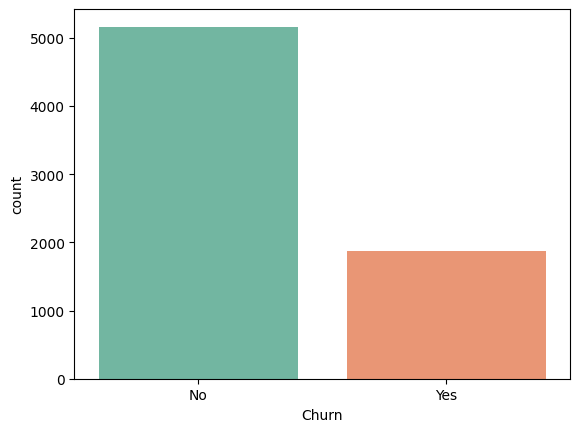

In [11]:
sns.countplot(x='Churn', data=df, palette='Set2')

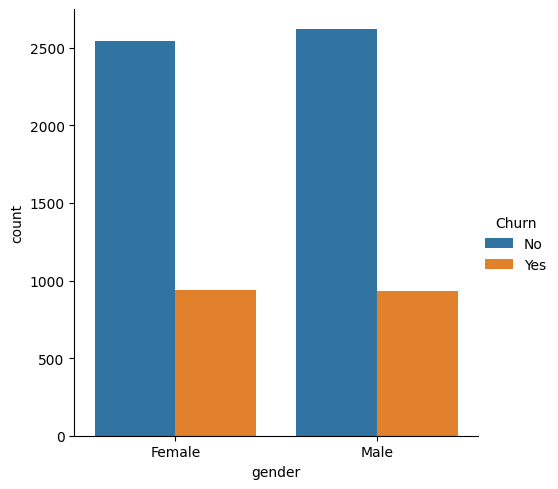

In [12]:
sns.catplot(x='gender', hue='Churn', kind='count', data=df)

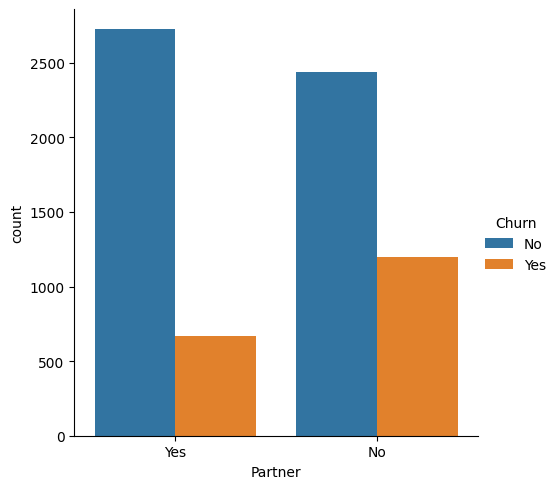

In [13]:
sns.catplot(x='Partner', hue='Churn', kind='count', data=df)

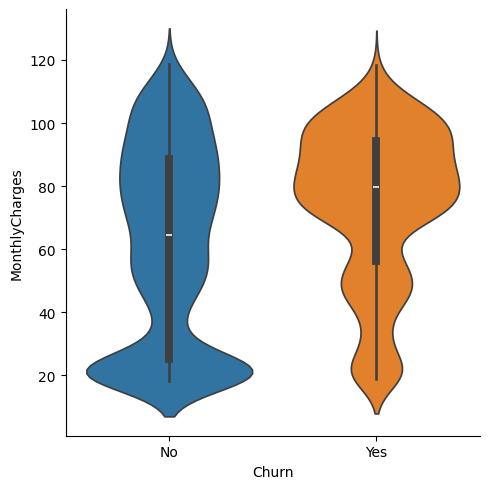

In [14]:
sns.catplot(x='Churn', y='MonthlyCharges', hue='Churn', kind='violin', data=df)

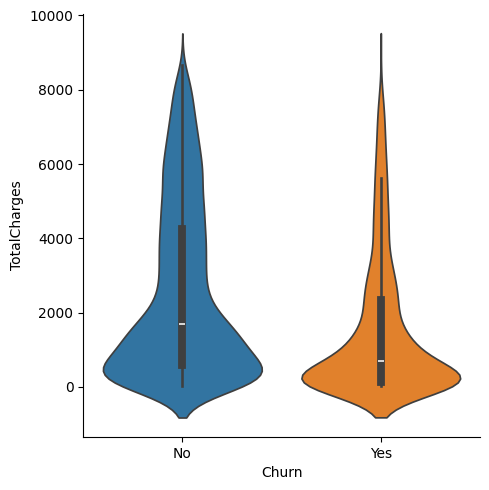

In [15]:
sns.catplot(x='Churn', y='TotalCharges', hue='Churn', kind='violin', data=df)

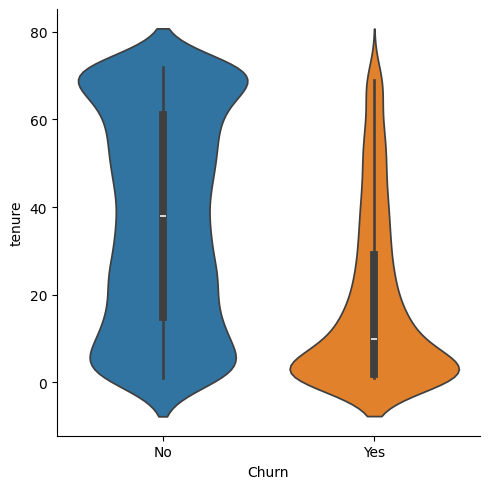

In [16]:
sns.catplot(x='Churn', y='tenure', hue='Churn', kind='violin', data=df)

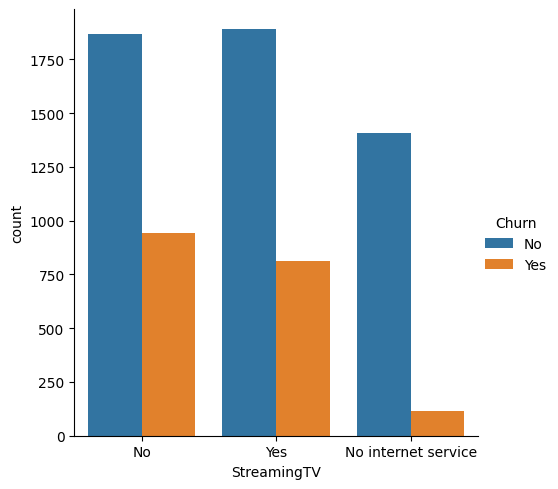

In [17]:
sns.catplot(x='StreamingTV', hue='Churn', kind='count', data=df)

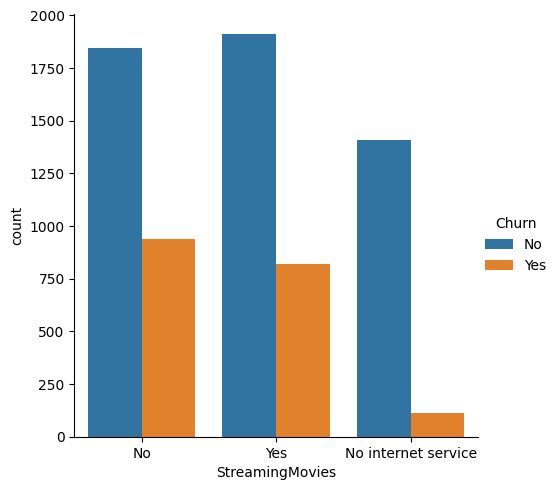

In [18]:
sns.catplot(x='StreamingMovies', hue='Churn', kind='count', data=df)

<Axes: xlabel='Contract', ylabel='TotalCharges'>

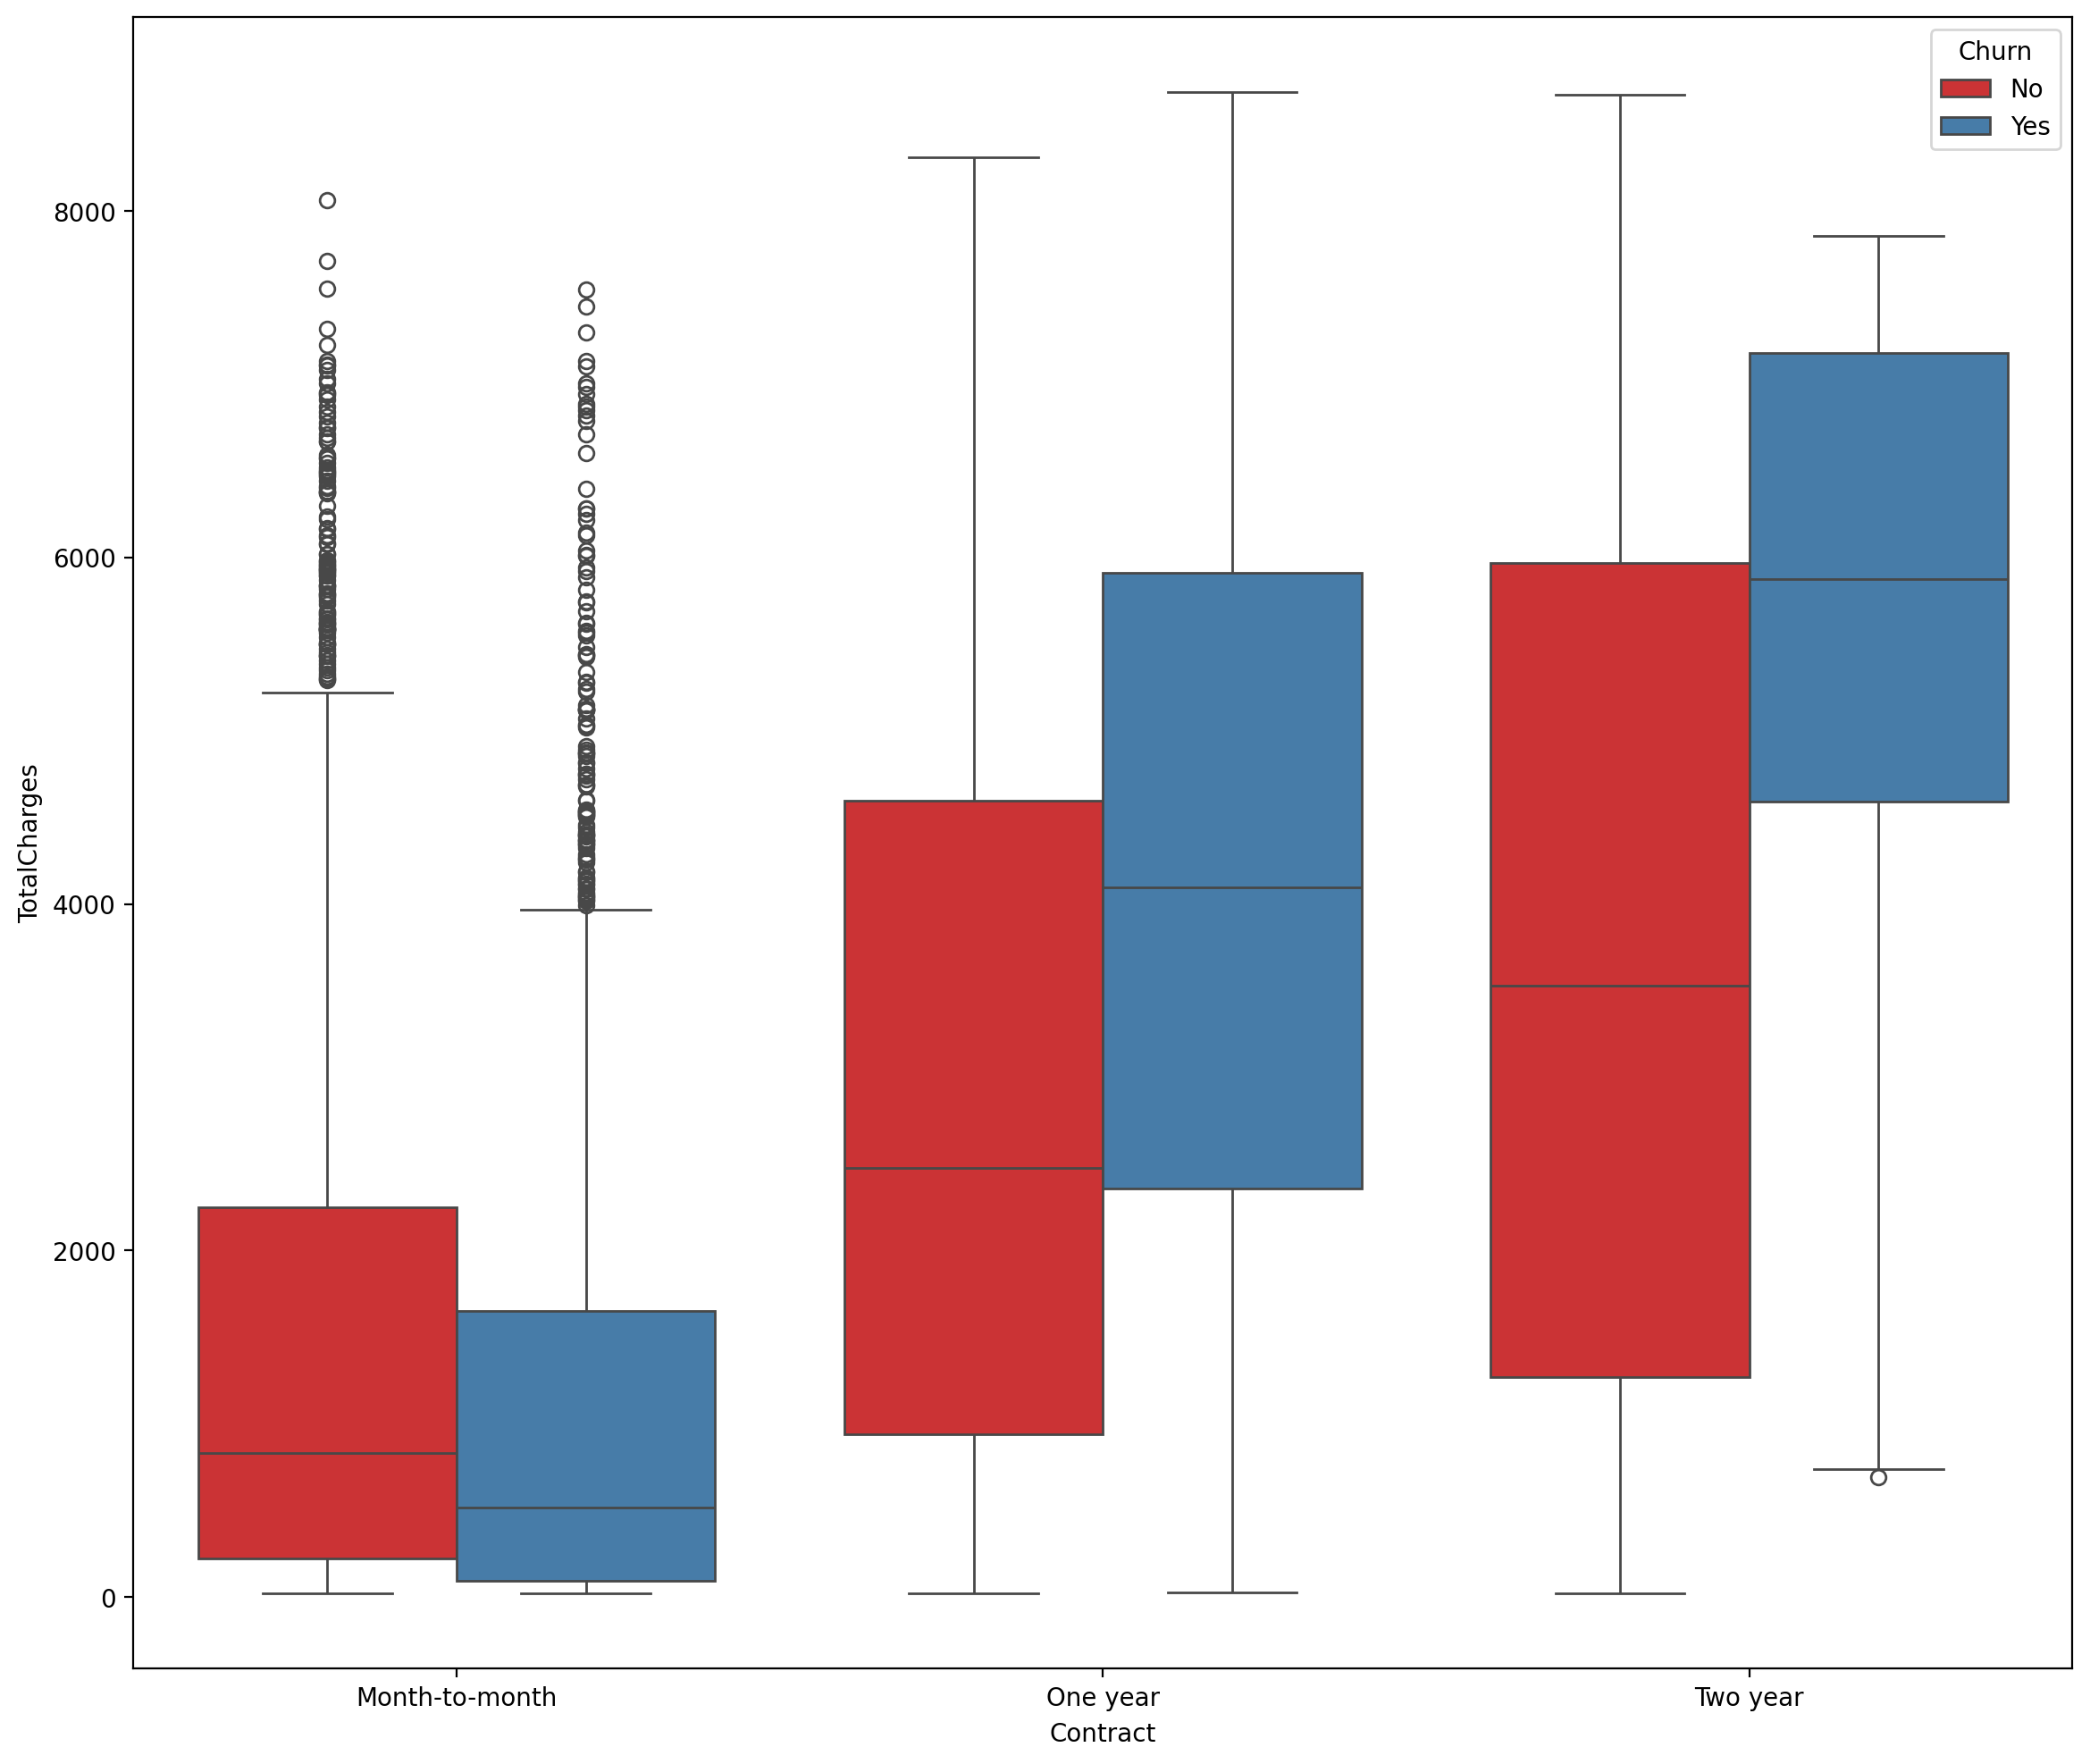

In [19]:
plt.figure(figsize=(14,12), dpi=200)
sns.boxplot(x='Contract',y='TotalCharges', hue='Churn', data=df, palette='Set1')

In [20]:
df_dummies = pd.get_dummies(df, drop_first=True, dtype=int)

<Axes: >

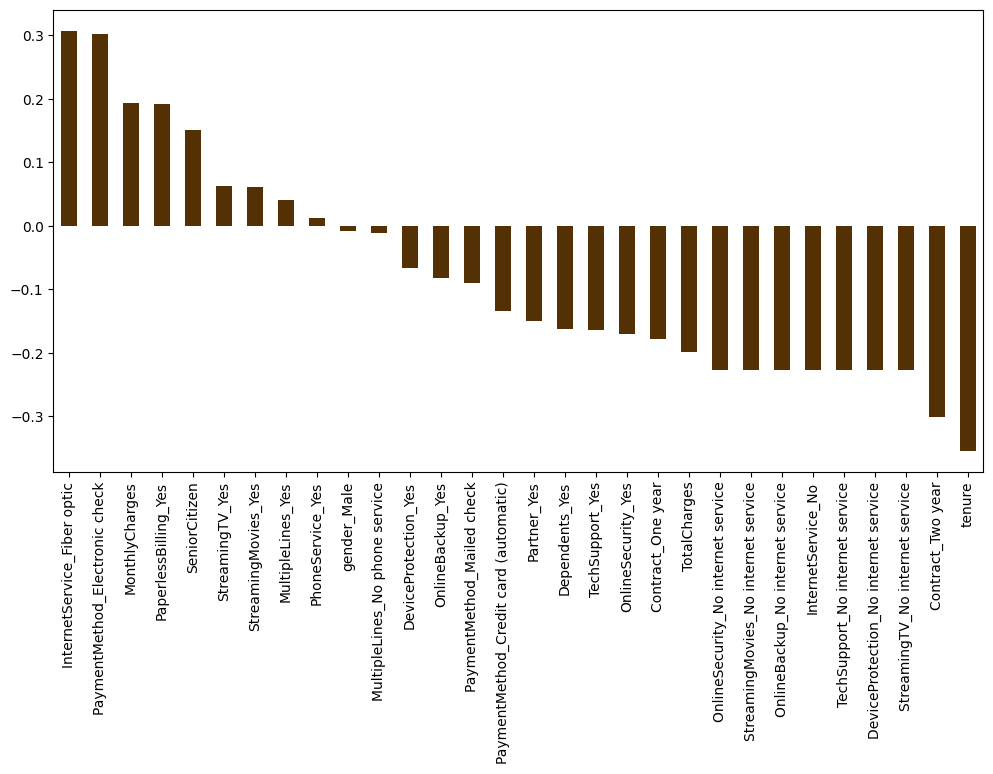

In [21]:
df_dummies.corr()['Churn_Yes'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(12,6),colormap='BrBG')

<Axes: >

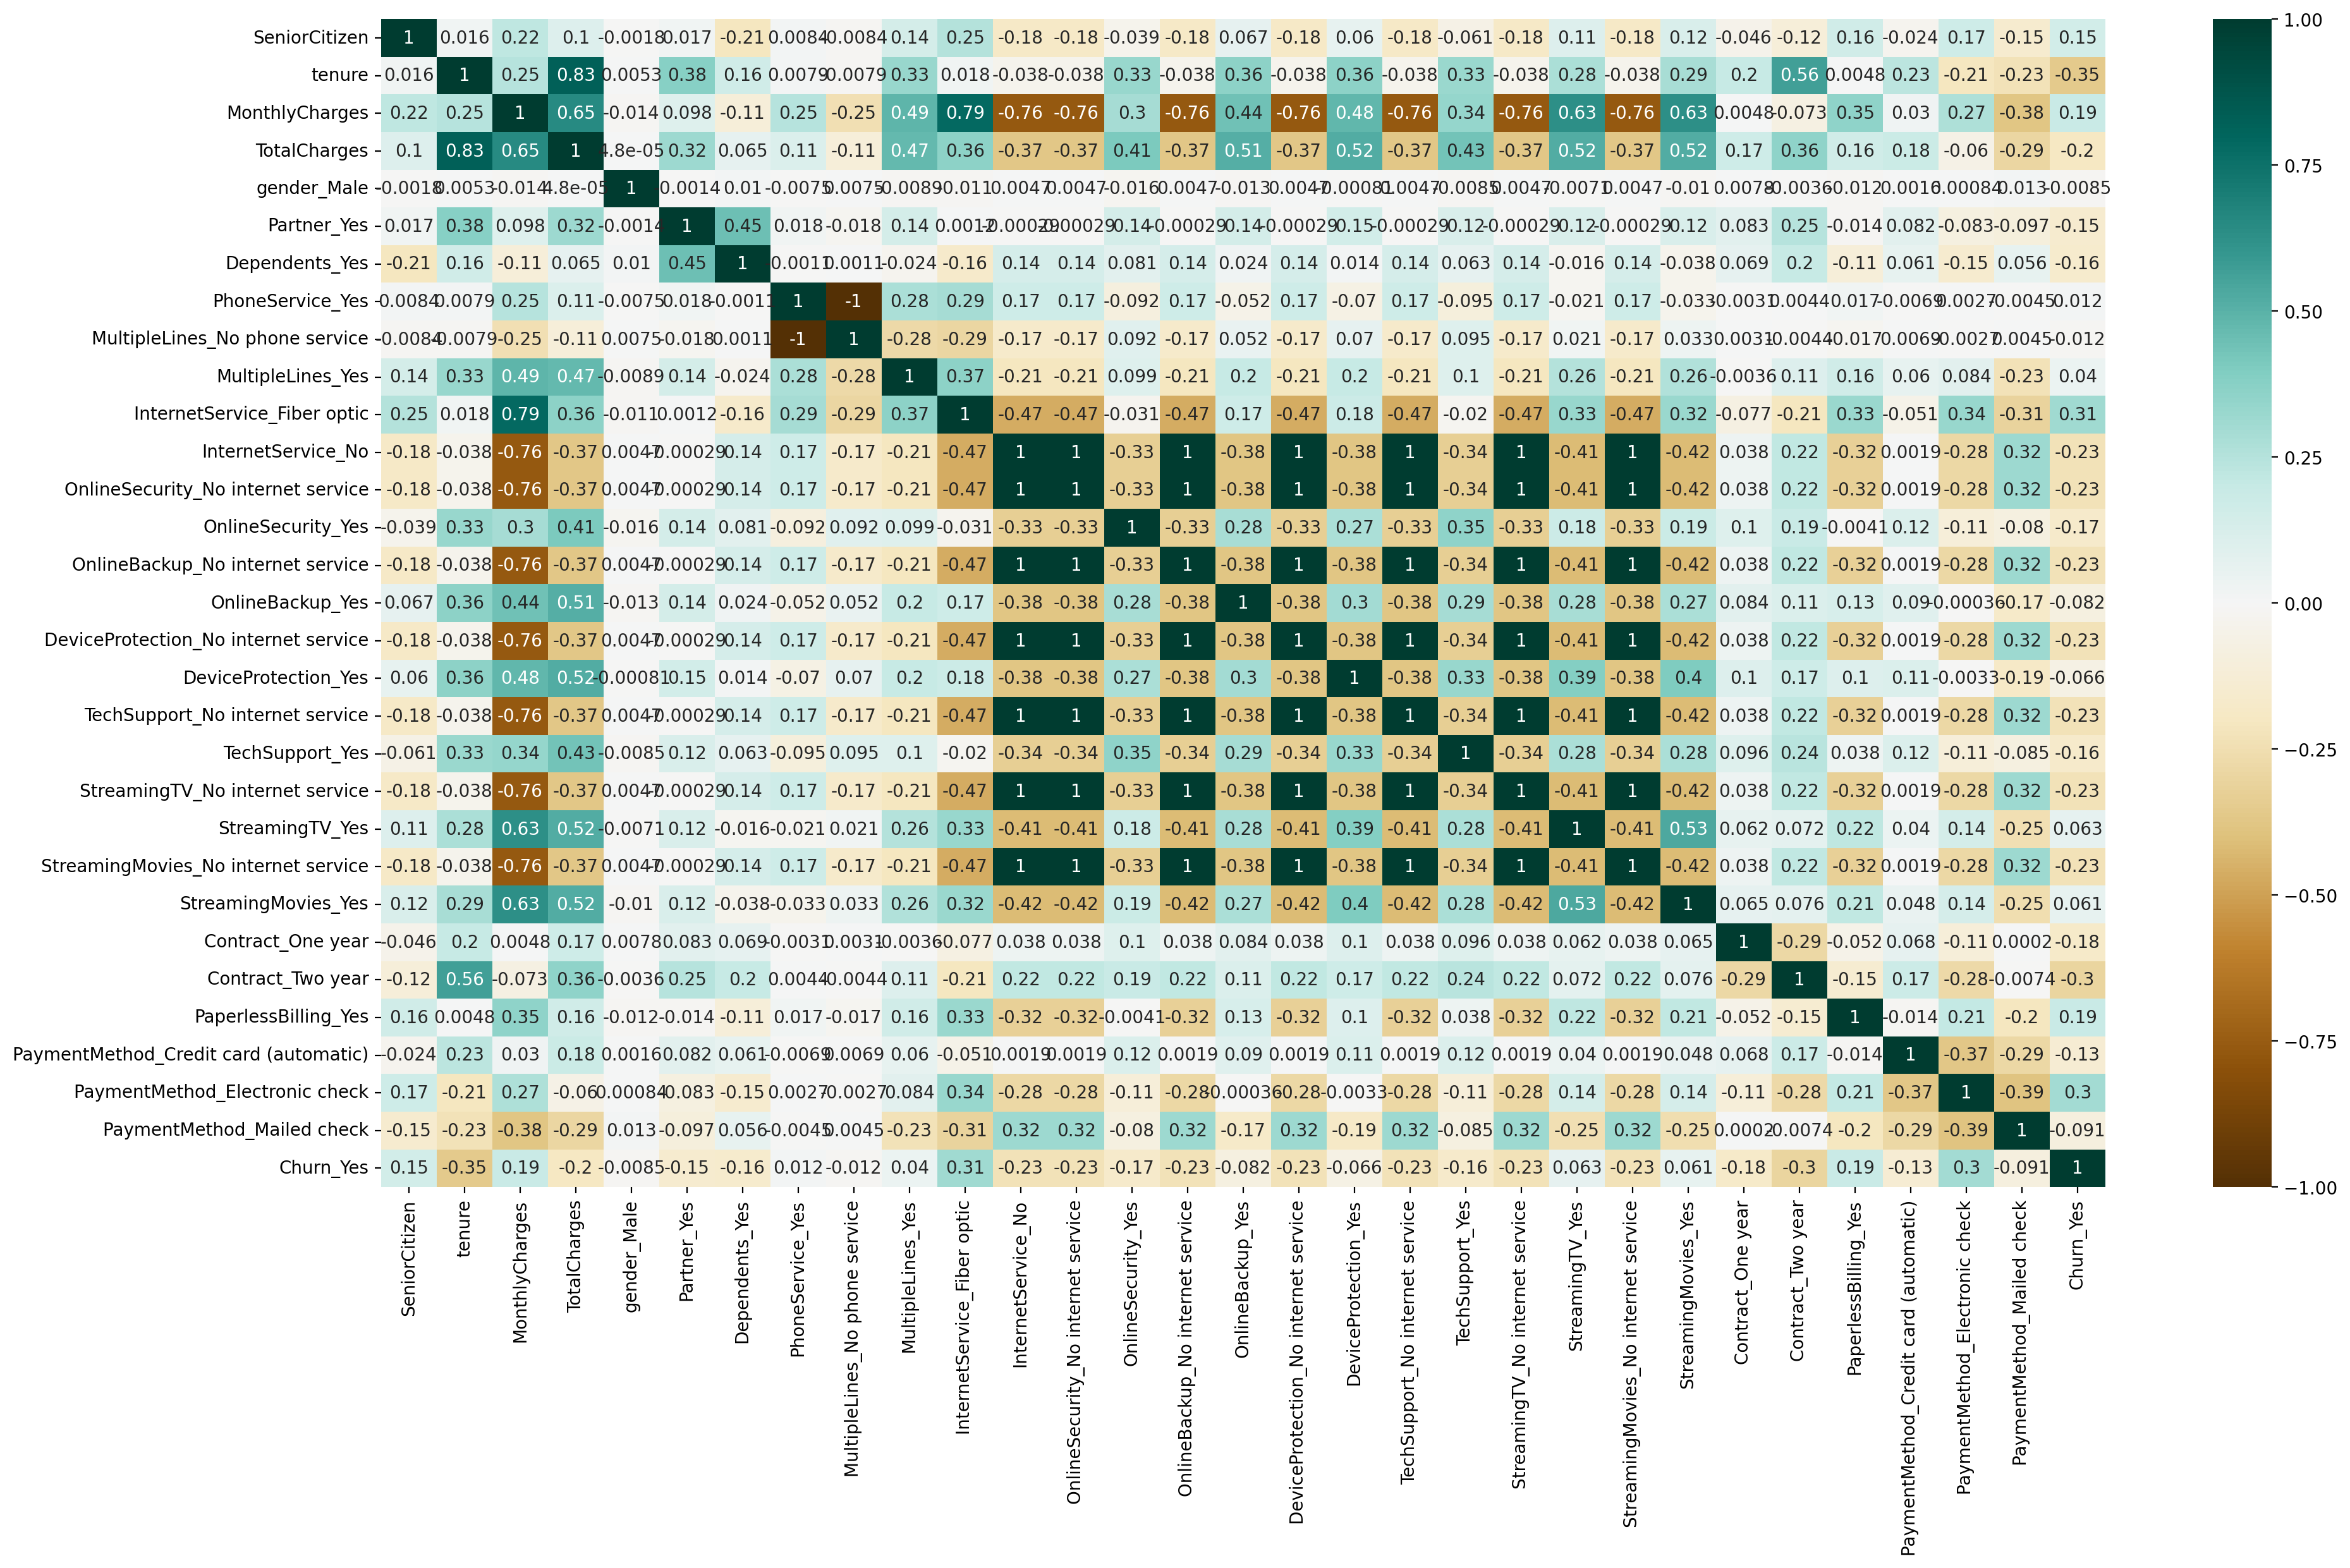

In [22]:
plt.figure(figsize=(22,12), dpi=200)
sns.heatmap(df_dummies.corr(), annot=True, cmap='BrBG')

<Axes: xlabel='tenure', ylabel='Count'>

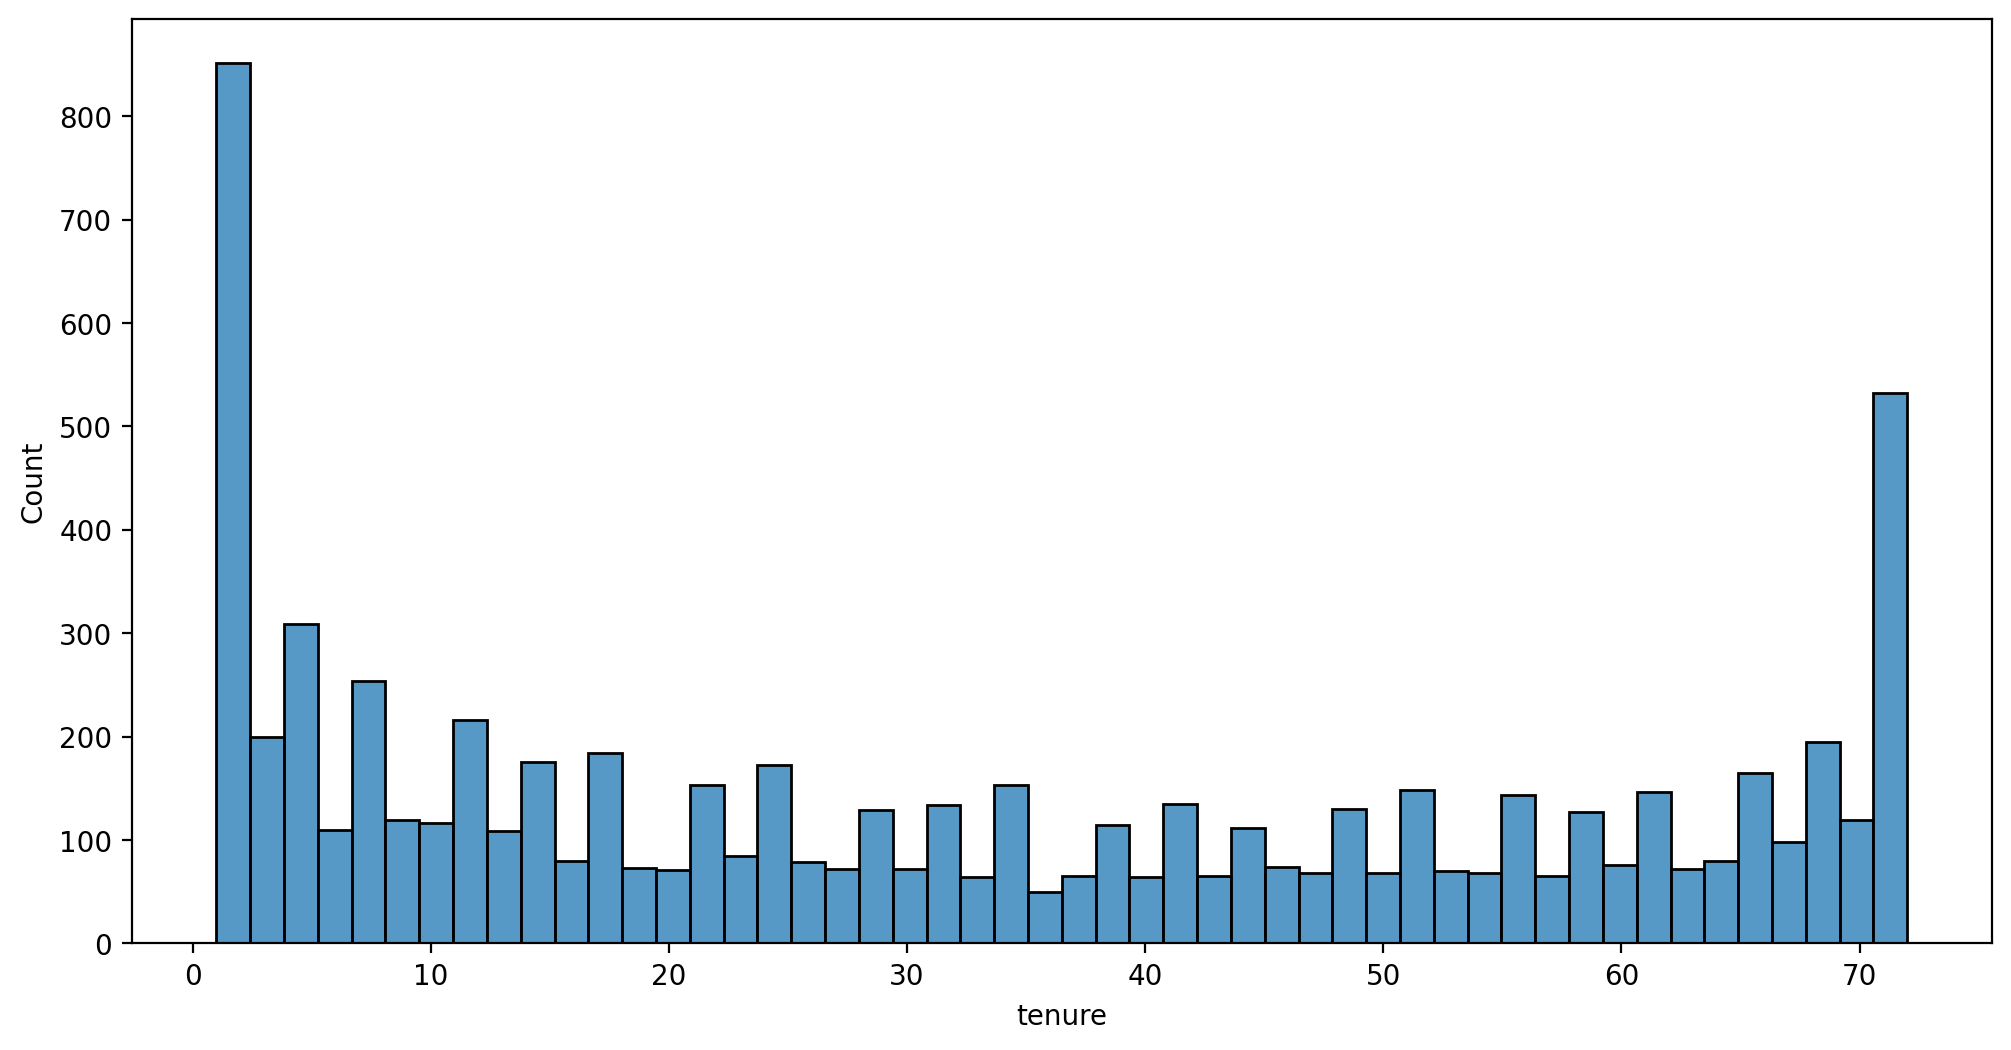

In [23]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(x='tenure', data=df,bins=50)

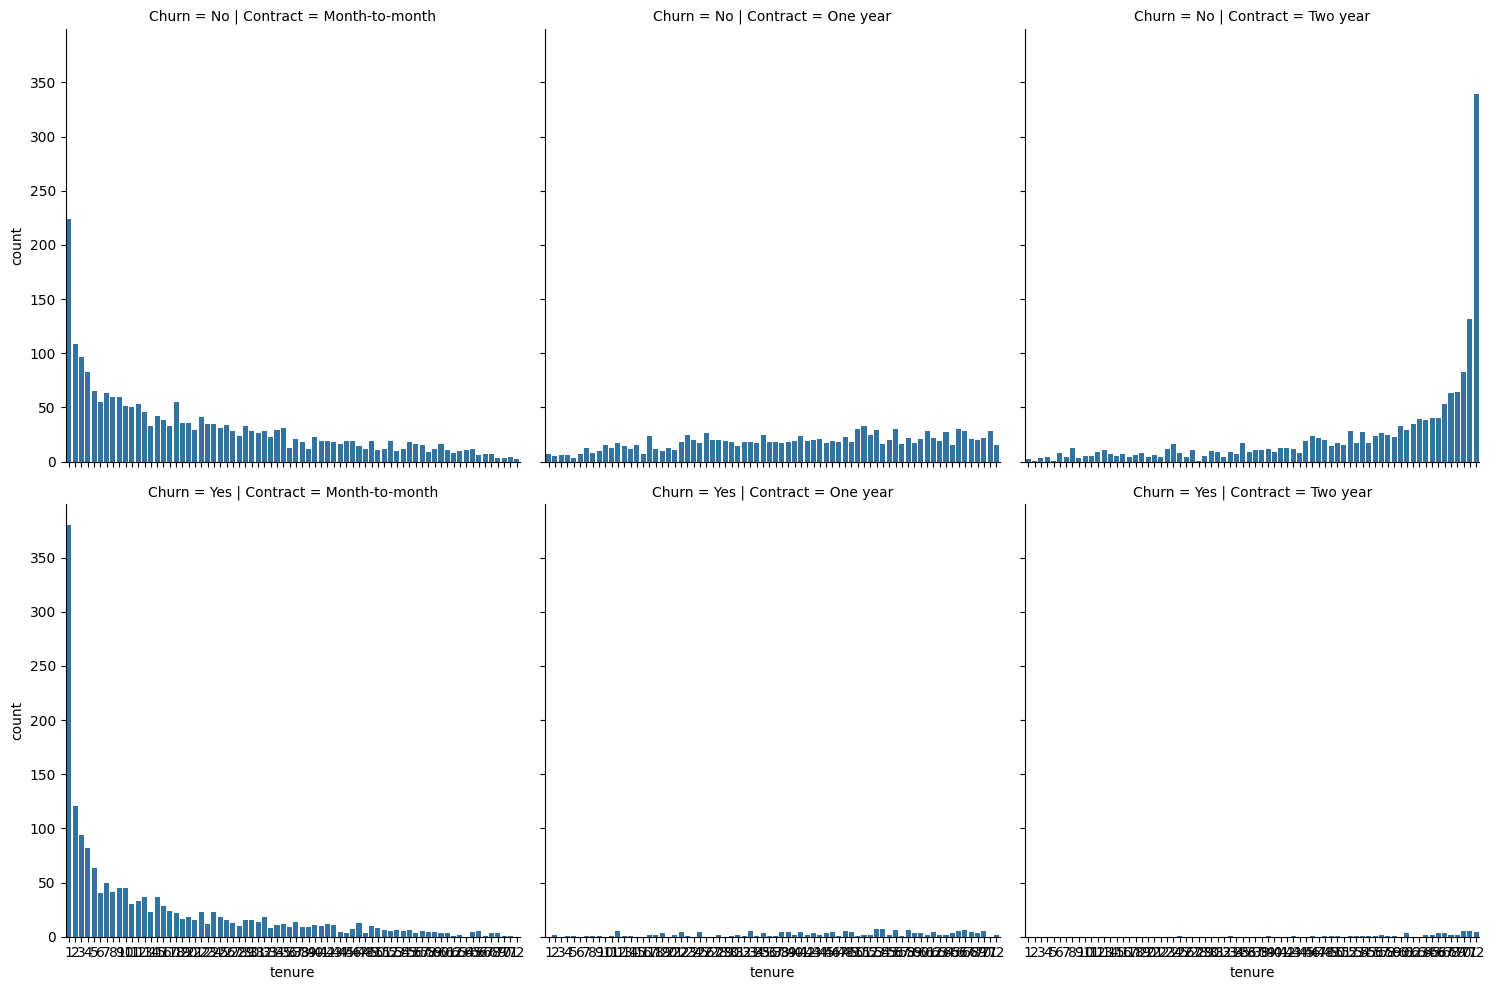

In [24]:
sns.catplot(x='tenure', kind='count', data=df, col='Contract', row='Churn')

In [25]:
plt.figure(figsize=(12,6), dpi=1000)
sns.scatterplot(y='TotalCharges', x='MonthlyCharges',data=df,hue='Churn',palette='Set1')

Output hidden; open in https://colab.research.google.com to view.

In [26]:
churn_percentage = df.groupby('tenure').apply( lambda x: (x['Churn'] == 'Yes').mean() * 100).reset_index()

churn_percentage.columns = ['Tenure (Months)', 'Churn Percentage']

churn_percentage = churn_percentage.sort_values('Tenure (Months)')

In [29]:
churn_percentage.head()

Tenure (Months)  Churn Percentage
0                1         61.990212
1                2         51.680672
2                3         47.000000
3                4         47.159091
4                5         48.120301

<Axes: xlabel='Tenure (Months)', ylabel='Churn Percentage'>

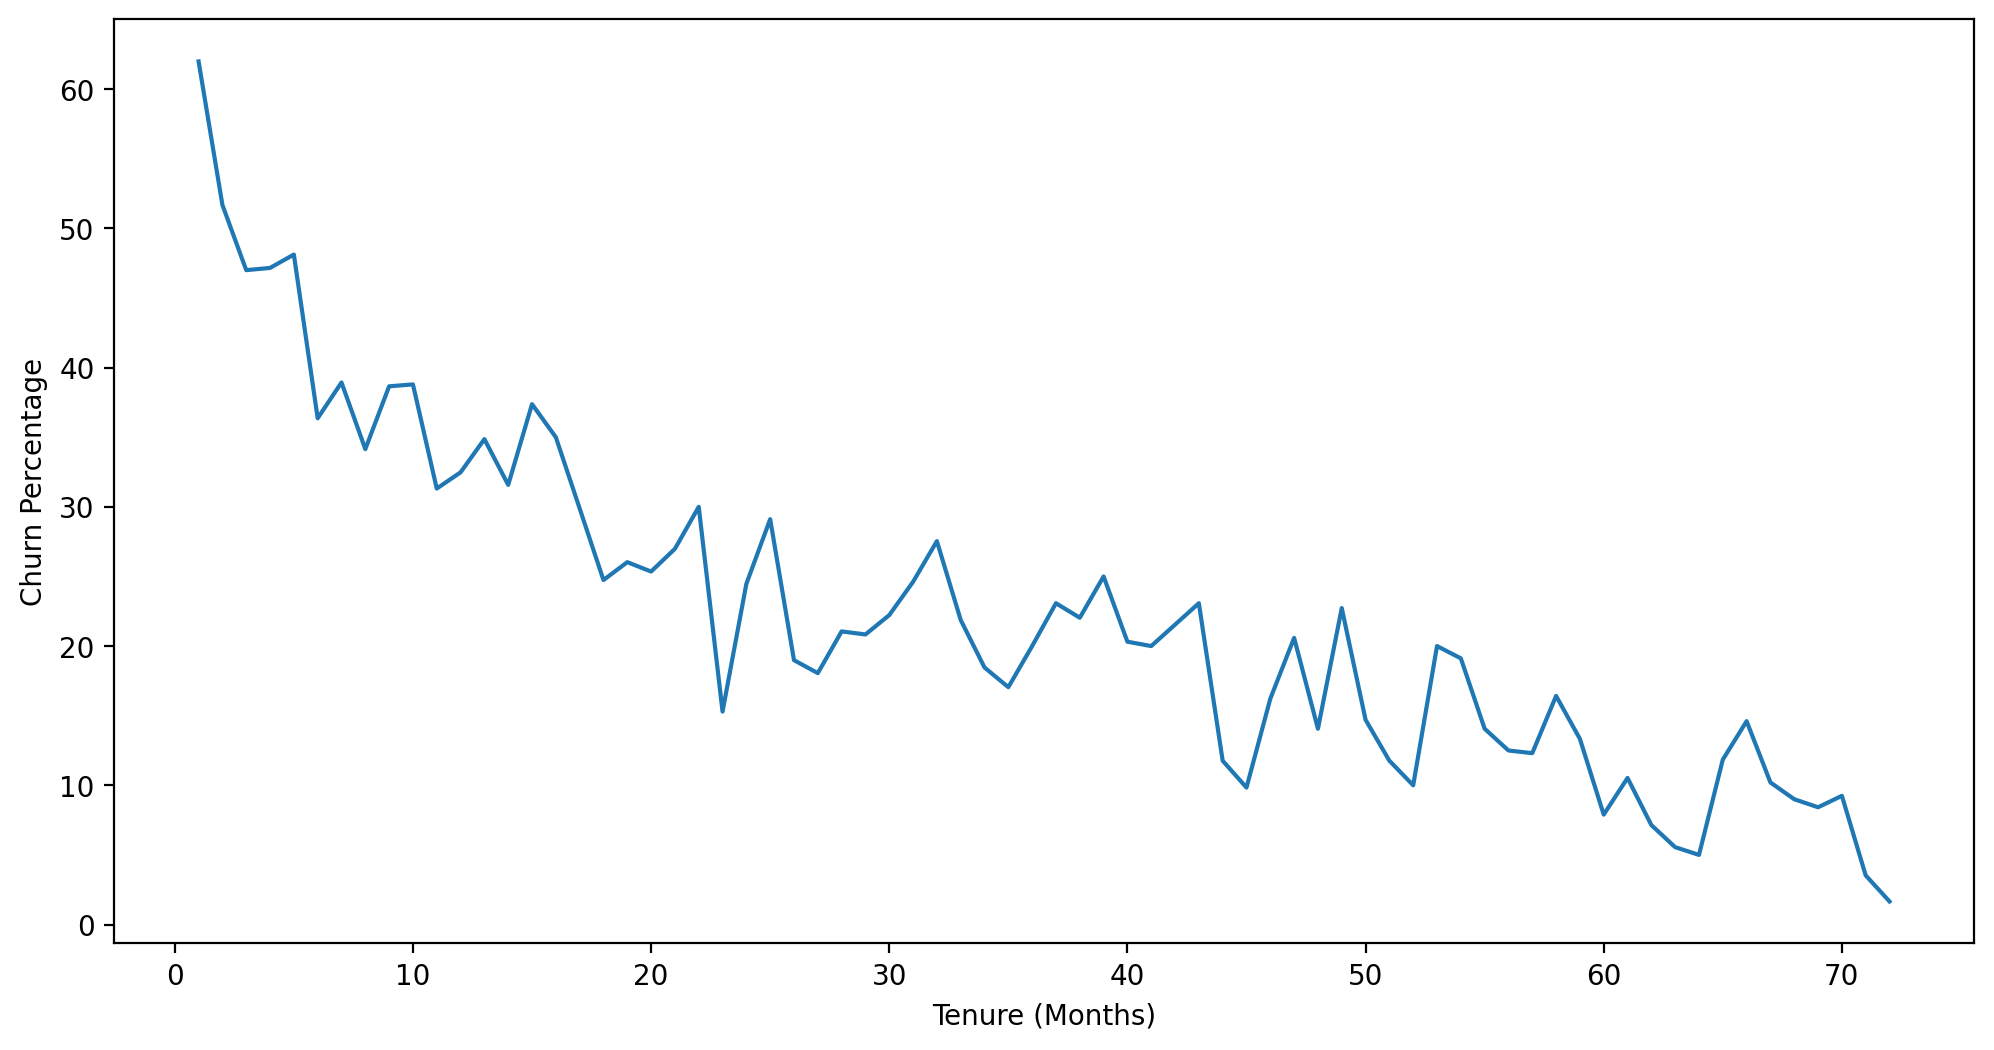

In [30]:
plt.figure(figsize=(12,6), dpi=200)
sns.lineplot(x='Tenure (Months)', y='Churn Percentage', data=churn_percentage)

In [34]:
def teuner_cohort(x):
  if x<=12:
    return '0-12 Months'
  elif x<=24:
    return '12-24 Months'
  elif x<=48:
    return '24-48 Months'
  else:
    return 'Over 48 Months'
df['Tenure Cohort'] = df['tenure'].apply(teuner_cohort)

In [38]:
df[['tenure','Tenure Cohort']].head(10)

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

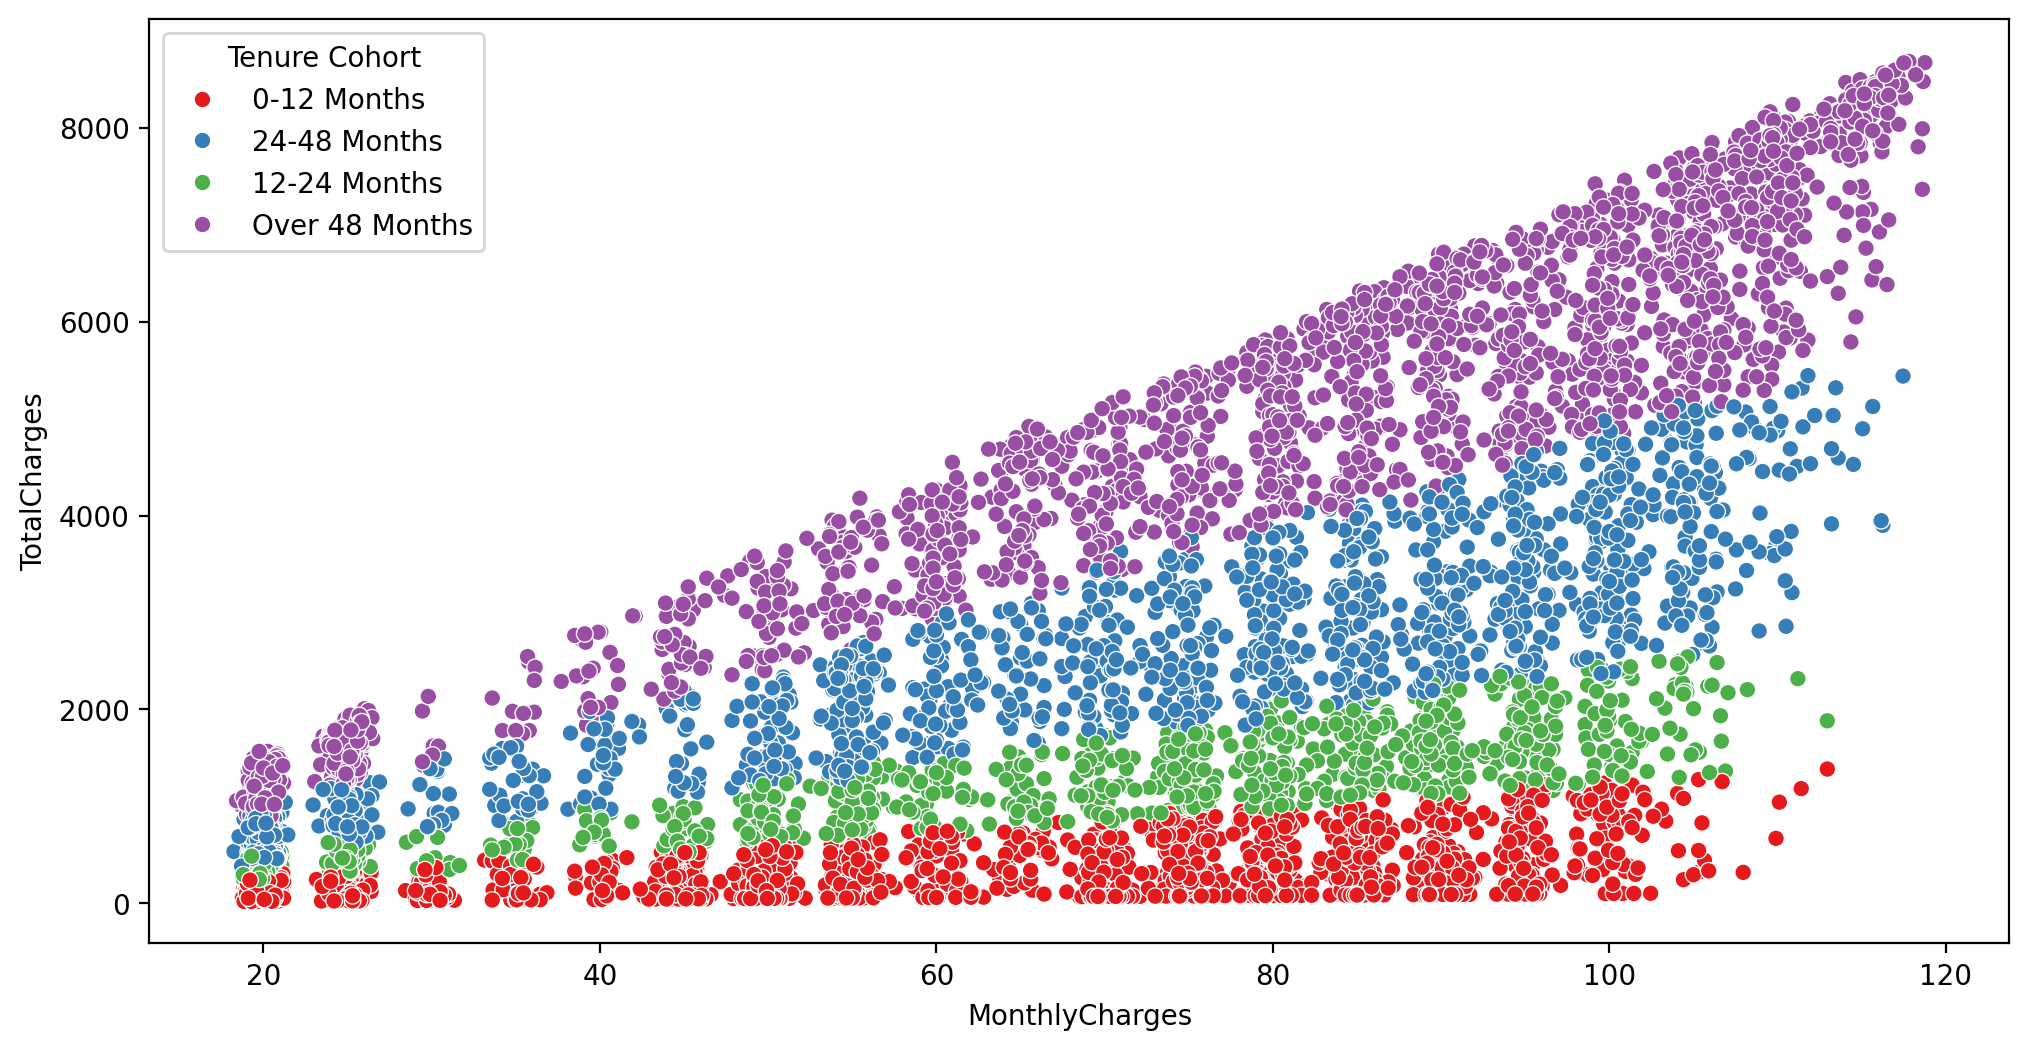

In [39]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(y='TotalCharges', x='MonthlyCharges',data=df,hue='Tenure Cohort',palette='Set1')

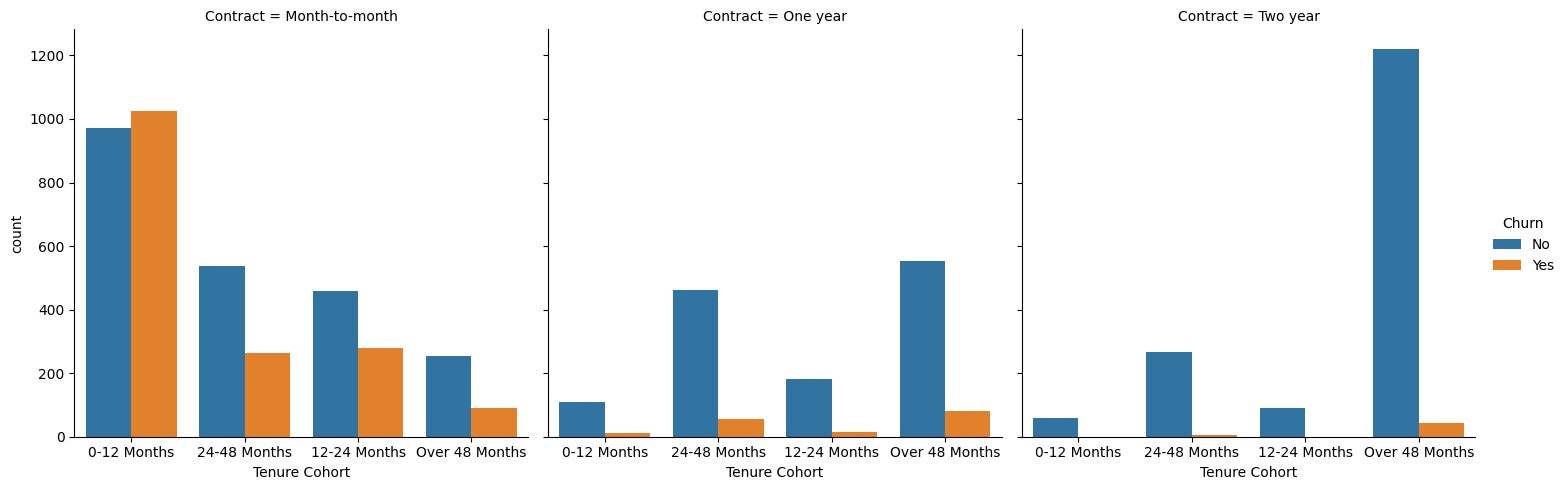

In [44]:
sns.catplot(x='Tenure Cohort', kind='count', data=df, col='Contract', hue='Churn')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

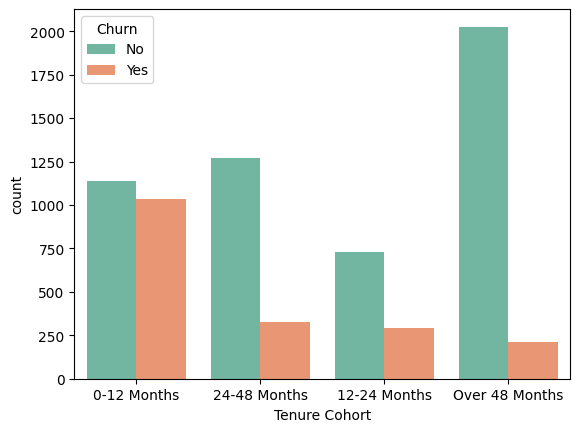

In [43]:
sns.countplot(x='Tenure Cohort', data=df, hue='Churn', palette='Set2')

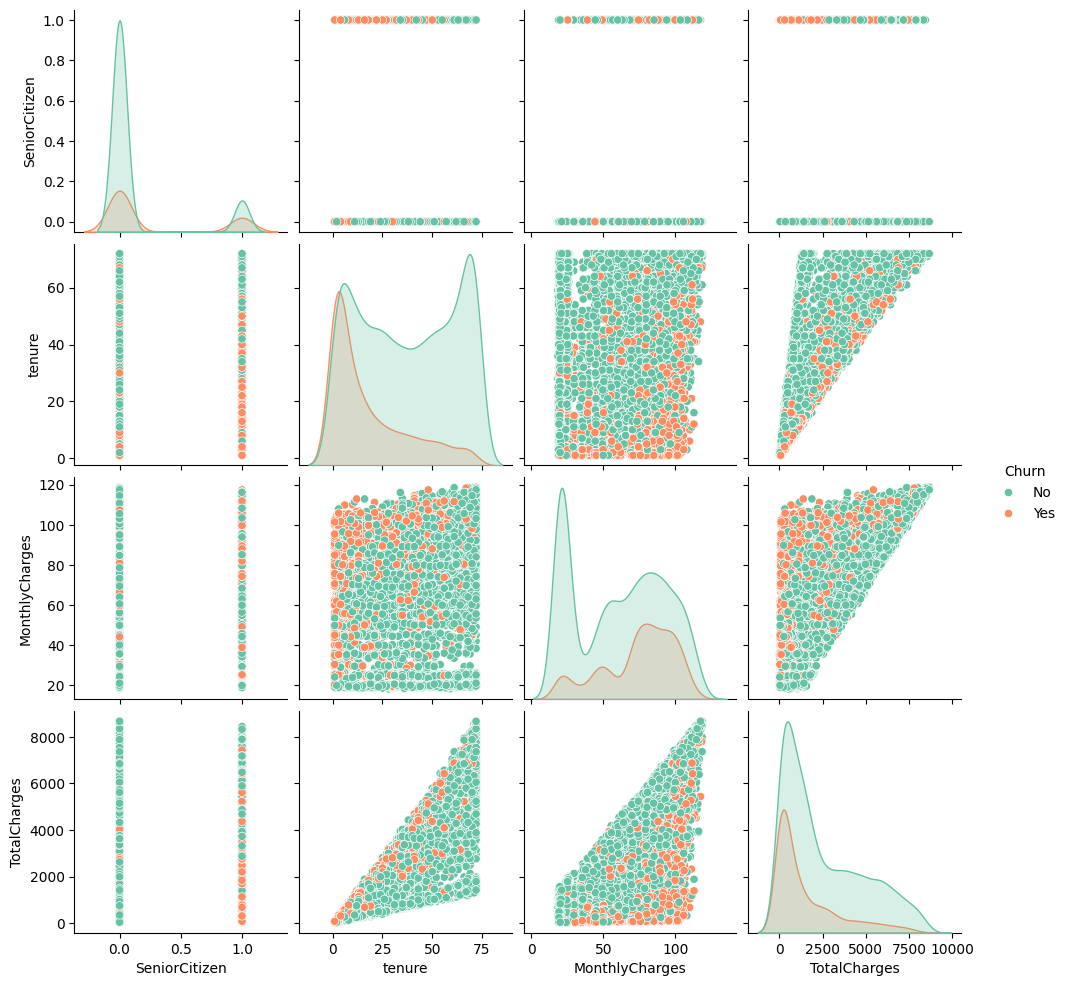

In [45]:
sns.pairplot(df, hue='Churn', palette='Set2')

# Model Building and Evaluation

In [95]:
df.drop('Tenure Cohort', axis=1, inplace=True)

In [96]:
X = df.drop('Churn',axis=1)
y= df['Churn']

In [97]:
X = pd.get_dummies(X, drop_first=True,dtype=int)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [99]:
X_train

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
2273              1       7           48.20        340.35            0   
3739              0       7           94.25        669.00            1   
4480              1      42           74.15       3229.40            0   
6098              0       1           19.95         19.95            1   
1498              1      45          102.15       4735.35            0   
...             ...     ...             ...           ...          ...   
599               0      16           74.55       1170.50            1   
5695              0      19           86.85       1564.40            0   
1361              0      10           85.60        813.85            1   
1547              0      31           80.55       2471.60            0   
4959              0       3           63.60        155.65            0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
2273            0               0                 1   
3739            0               0                 1   
4480            1               0                 1   
6098            0               0                 1   
1498            0               0                 1   
...           ...             ...               ...   
599             0               0                 1   
5695            1               0                 1   
1361            1               0                 1   
1547            1               1                 1   
4959            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
2273                               0                  0  ...   
3739                               0                  0  ...   
4480                               0                  0  ...   
6098                               0                  0  ...   
1498                               0                  1  ...   
...                              ...                ...  ...   
599                                0                  0  ...   
5695                               0                  1  ...   
1361                               0                  1  ...   
1547                               0                  1  ...   
4959                               0                  1  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
2273                                0                0   
3739                                0                1   
4480                                0                0   
6098                                1                0   
1498                                0                1   
...                               ...              ...   
599                                 0                0   
5695                                0                1   
1361                                0                1   
1547                                0                1   
4959                                0                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
2273                                    0                    0   
3739                                    0                    1   
4480                                    0                    0   
6098                                    1                    0   
1498                                    0                    1   
...                                   ...                  ...   
599                                     0                    0   
5695                                    0                    0   
1361                                    0                    0   
1547                                    0                    1   
4959                                    0                    0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
2273                  0                  0                     1   
3739                  0                  0                   

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

              precision    recall  f1-score   support

          No       0.86      0.78      0.82       557
         Yes       0.38      0.50      0.43       147

    accuracy                           0.73       704
   macro avg       0.62      0.64      0.63       704
weighted avg       0.76      0.73      0.74       704



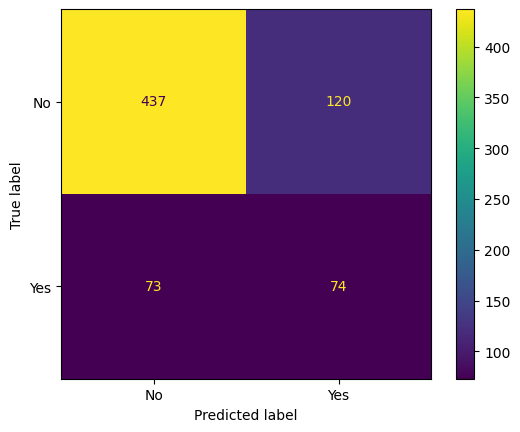

In [101]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

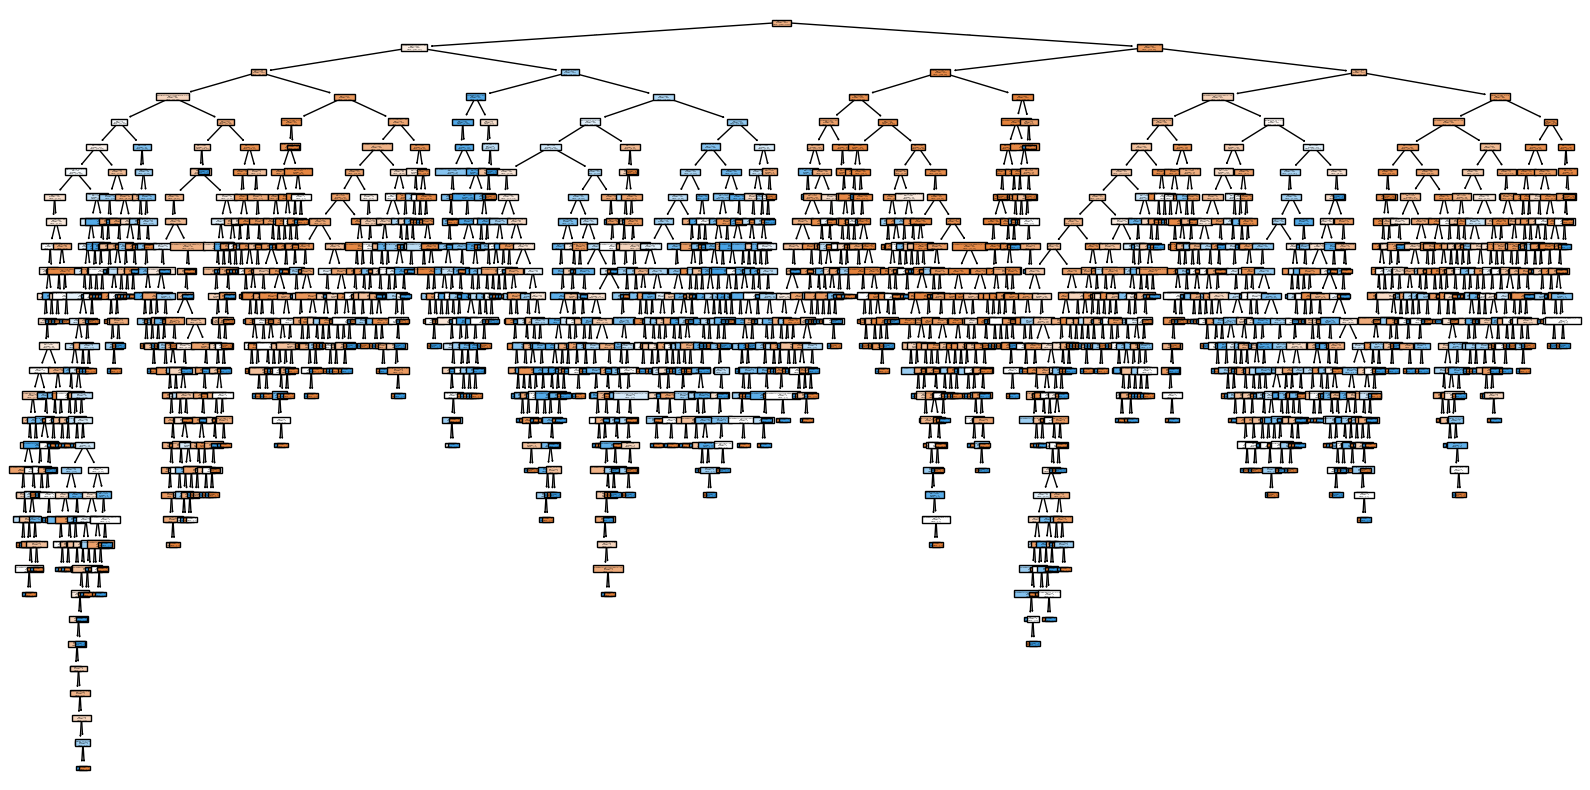

In [102]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

In [103]:
dt_2 = DecisionTreeClassifier(max_depth=3)
dt_2.fit(X_train, y_train)
y_pred = dt_2.predict(X_test)

              precision    recall  f1-score   support

          No       0.84      0.94      0.89       557
         Yes       0.60      0.34      0.43       147

    accuracy                           0.81       704
   macro avg       0.72      0.64      0.66       704
weighted avg       0.79      0.81      0.79       704



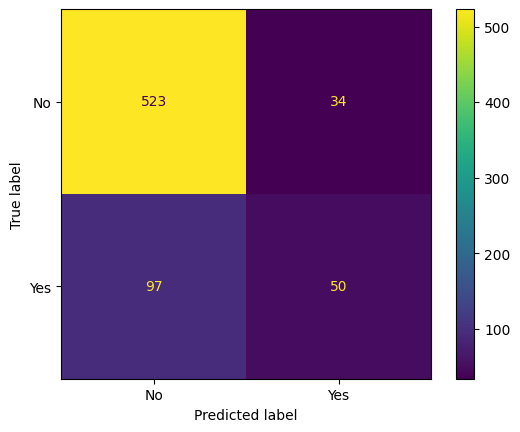

In [104]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

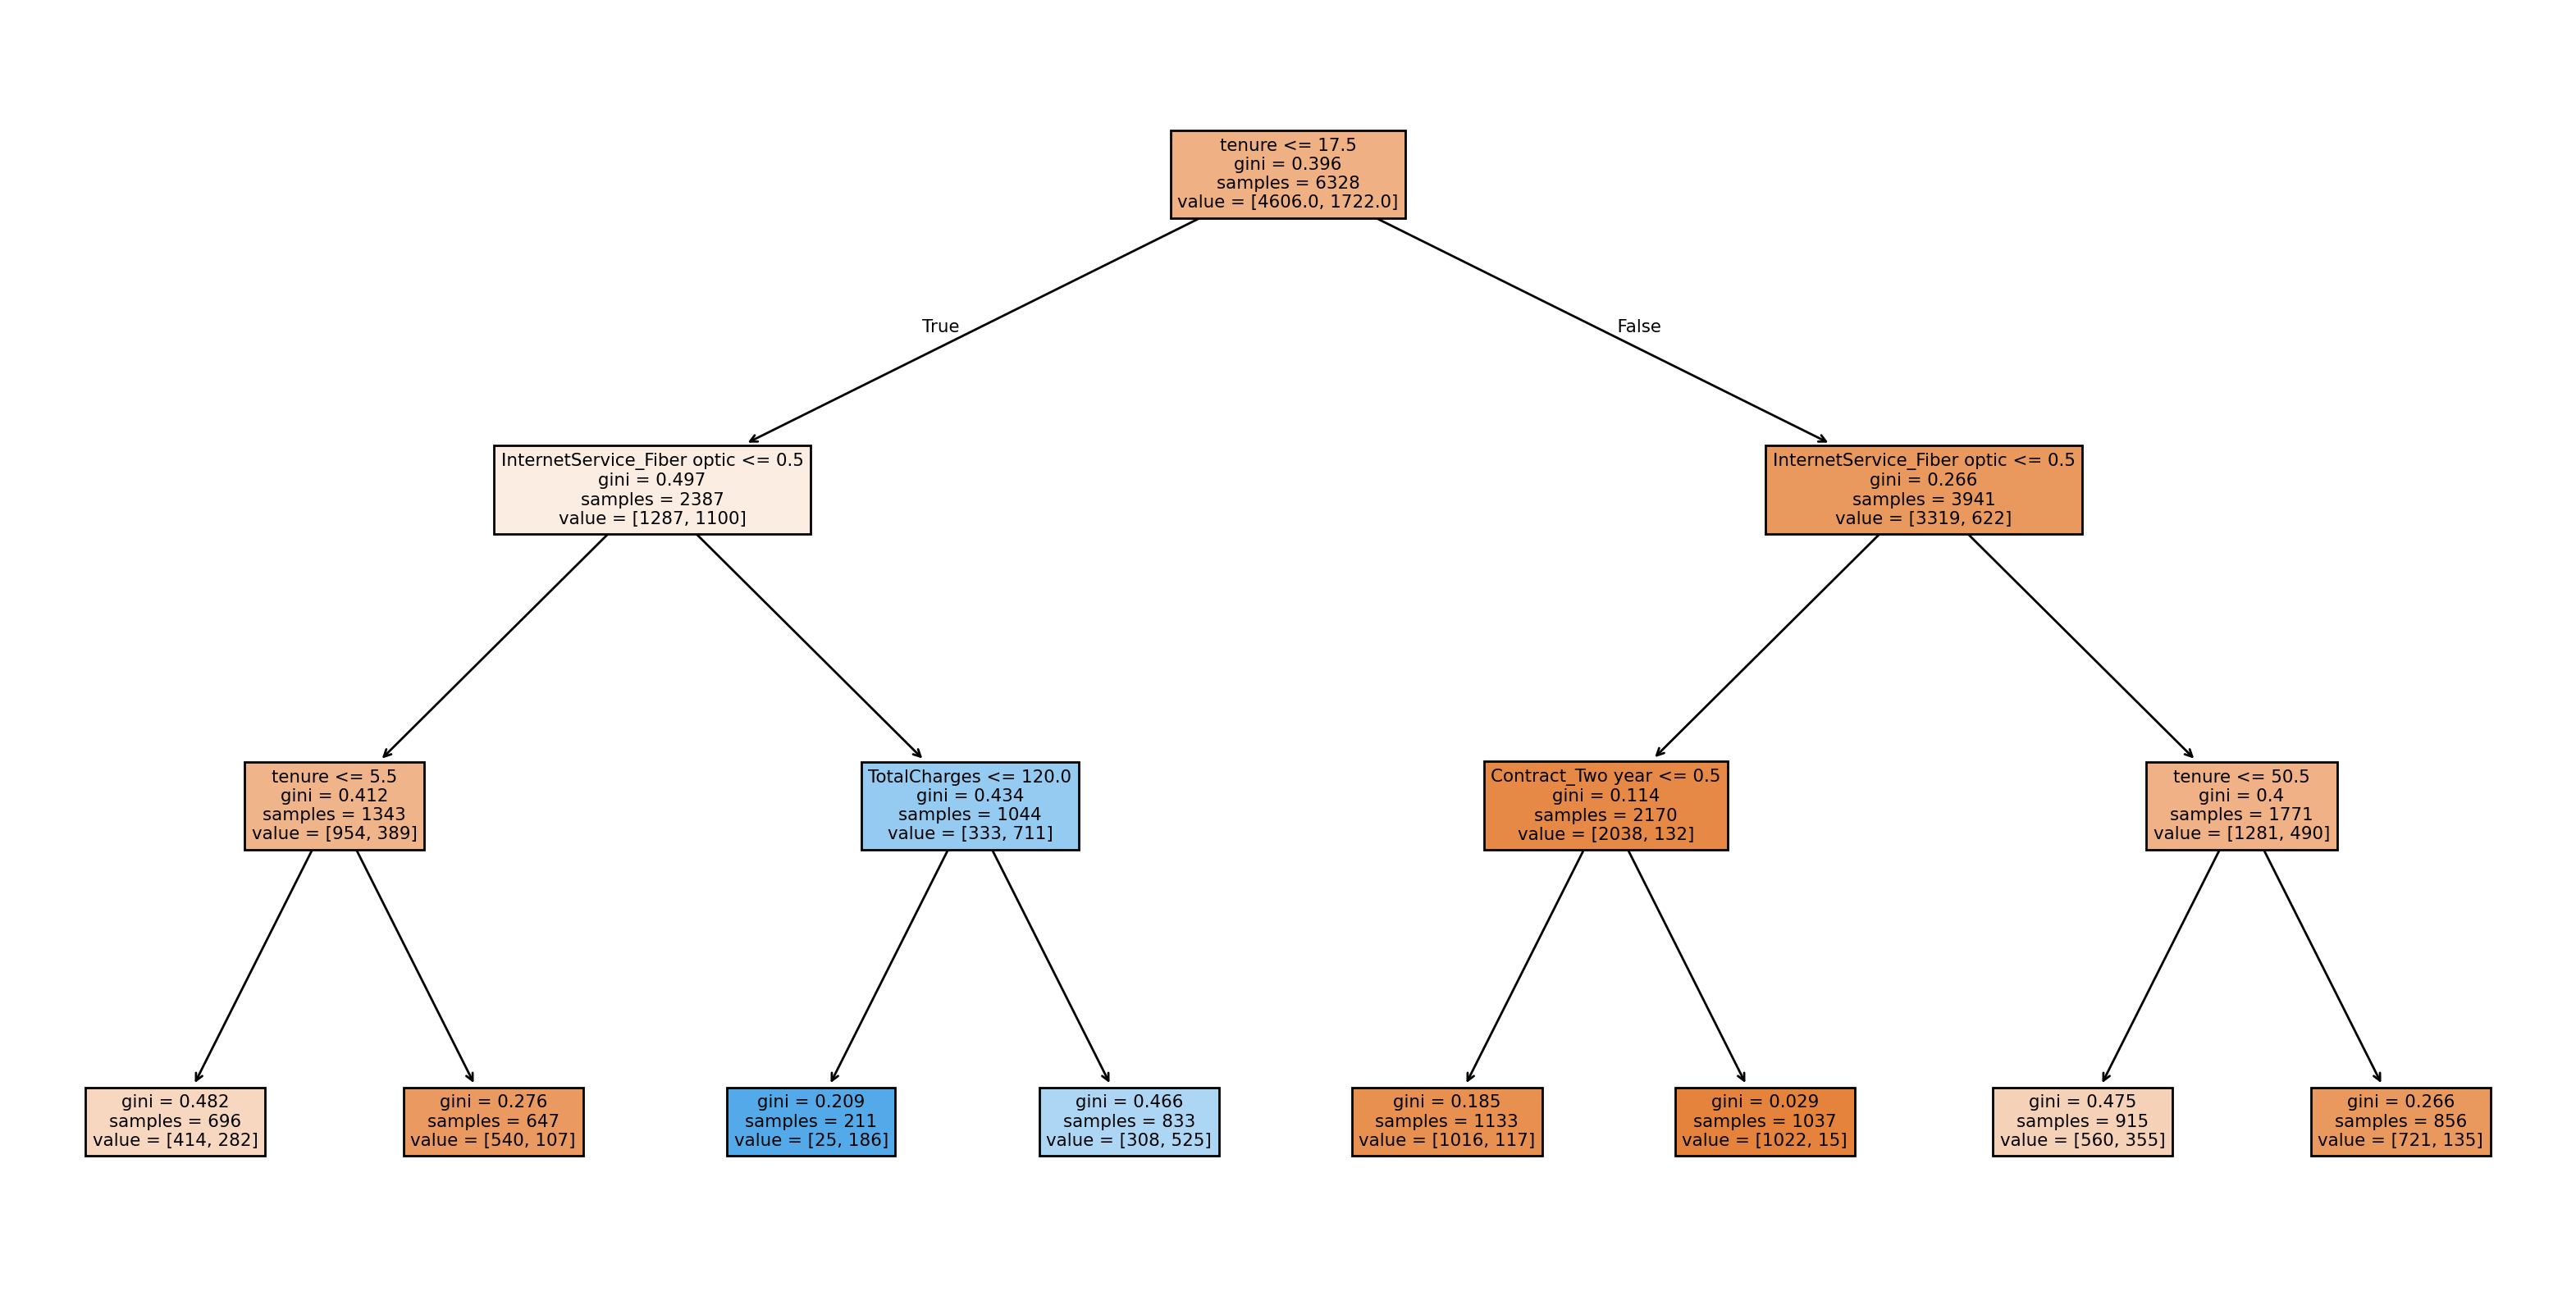

In [105]:
plt.figure(figsize=(20,10),dpi=200)
plot_tree(dt_2, filled=True, feature_names=X.columns)
plt.show()

In [123]:
grid_params = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
}
grid_model = GridSearchCV(estimator=dt, param_grid=grid_params, cv=5)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,
                                       30, 40, 50, 70, 90, 120, 150]})

In [124]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 5}

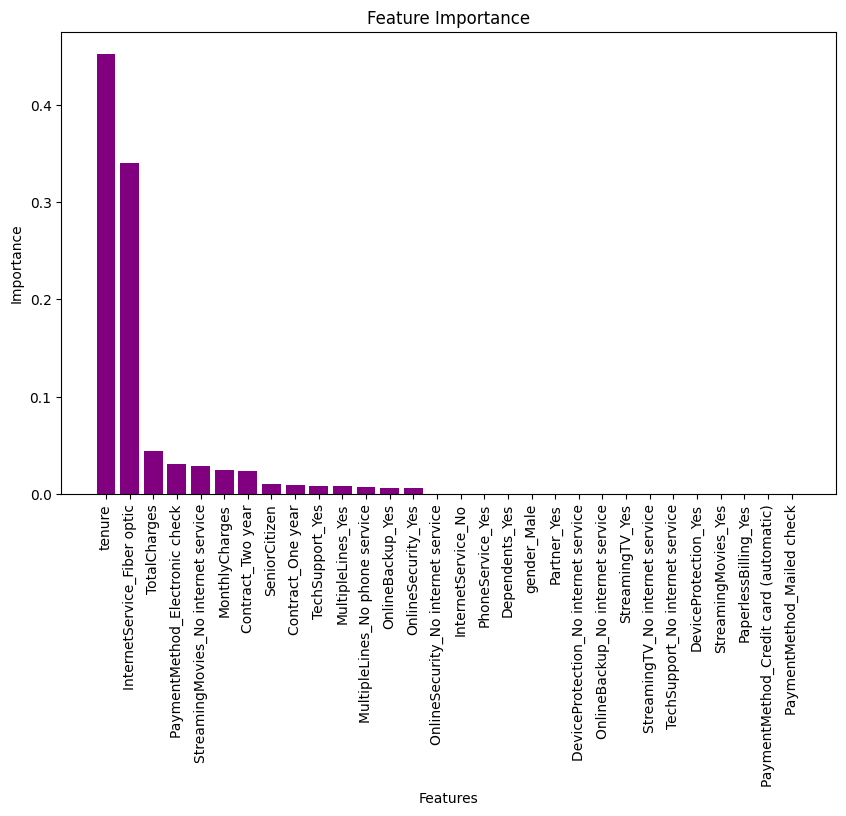

In [127]:
featur_impo_plot(grid_model.best_estimator_)

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.51      0.45      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



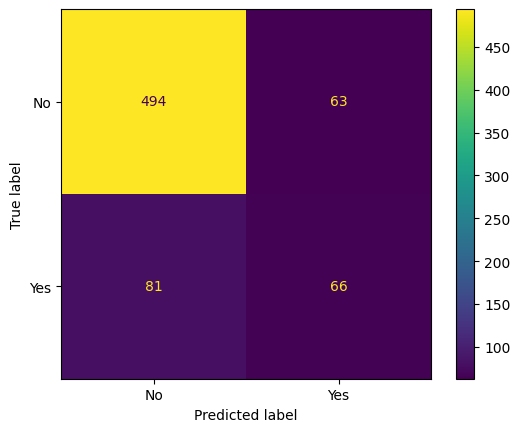

In [129]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [130]:
rf.feature_importances_

array([0.02100914, 0.17083546, 0.16837094, 0.1948429 , 0.0278702 ,
       0.02254313, 0.01872096, 0.00426627, 0.0039778 , 0.01924345,
       0.04067432, 0.00278928, 0.00815842, 0.02693848, 0.00559269,
       0.02215212, 0.00791157, 0.01882057, 0.00547308, 0.02225974,
       0.00588628, 0.01661147, 0.00266301, 0.01723936, 0.02378096,
       0.03308808, 0.02620382, 0.01332023, 0.03594486, 0.01281138])

In [131]:
def featur_impo_plot(model):
  feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
  feature_importances.sort_values('Importance', ascending=False, inplace=True)
  plt.figure(figsize=(10, 6))
  plt.bar(feature_importances['Feature'], feature_importances['Importance'],color='purple')
  plt.xlabel('Features')
  plt.ylabel('Importance')
  plt.title('Feature Importance')
  plt.xticks(rotation=90)
  plt.show()

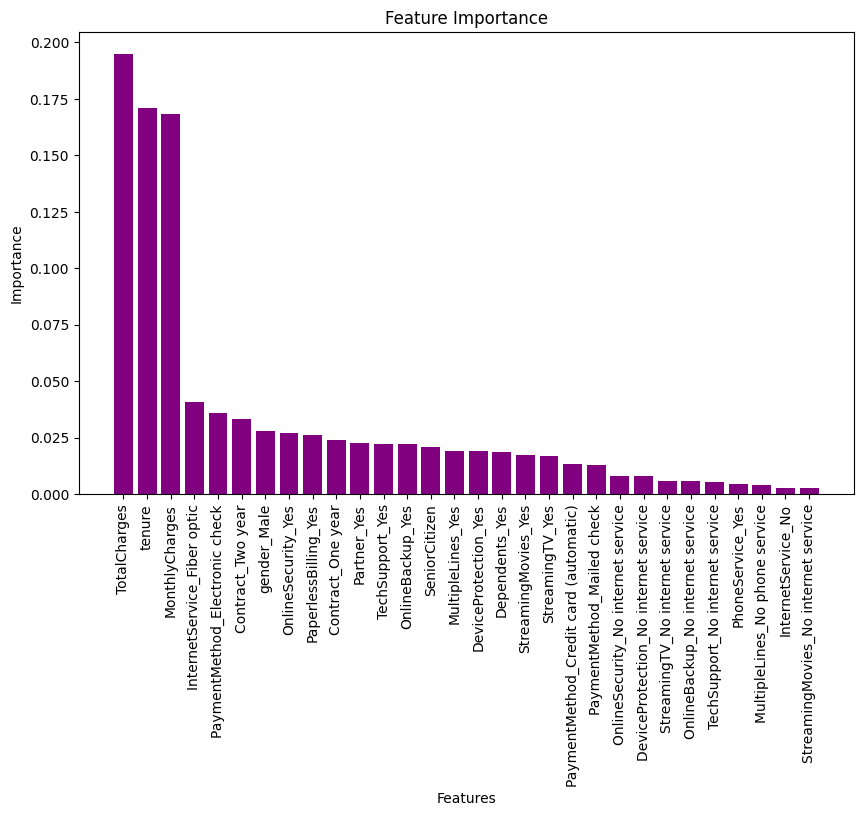

In [132]:
featur_impo_plot(rf)

In [133]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_estimators':[50,100,150,200],
               'max_features':['sqrt','log2'],
               'bootstrap':[True,False],
               'oob_score':[True,False]
               }
grid_search = GridSearchCV(estimator=rf, param_grid=grid_params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200],
                         'oob_score': [True, False]})

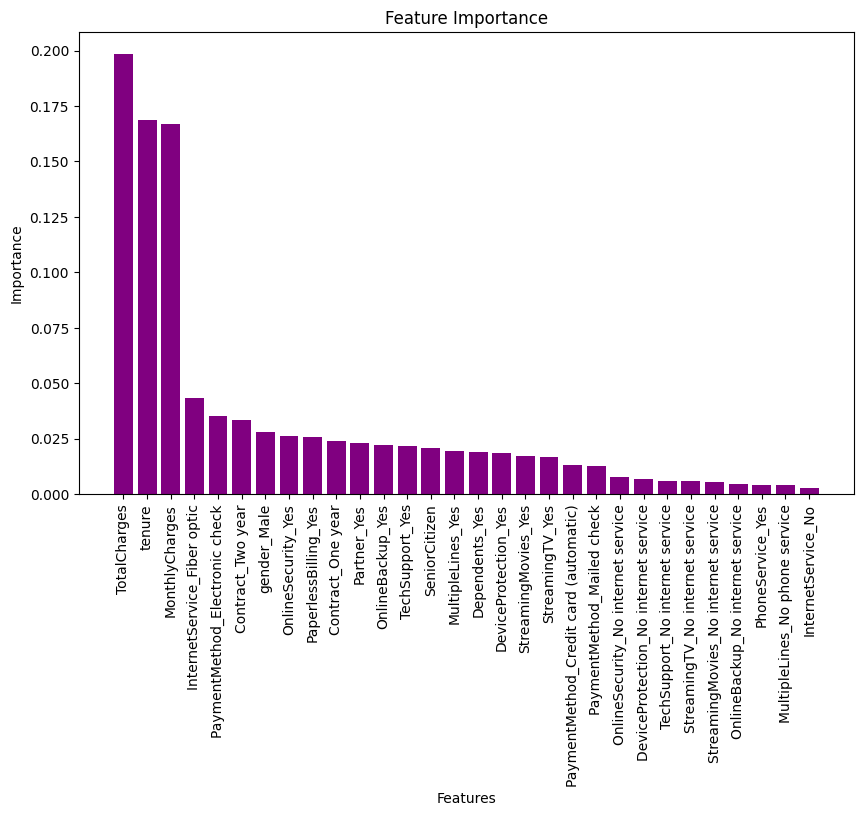

In [138]:
featur_impo_plot(grid_search.best_estimator_)

In [139]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 150,
 'oob_score': True}

In [140]:
y_pred = grid_search.predict(X_test)

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



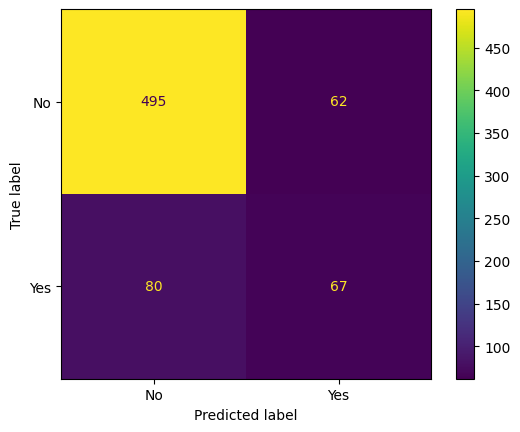

In [141]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [142]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100, random_state=101)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



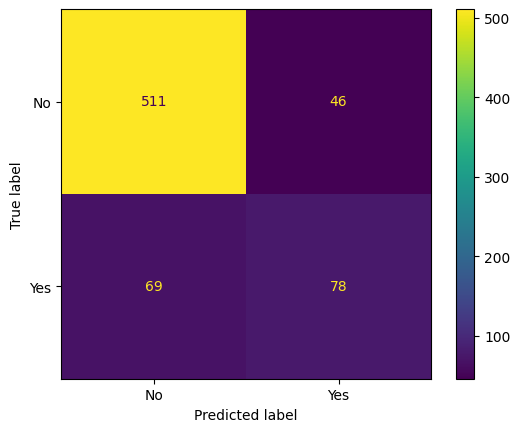

In [143]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

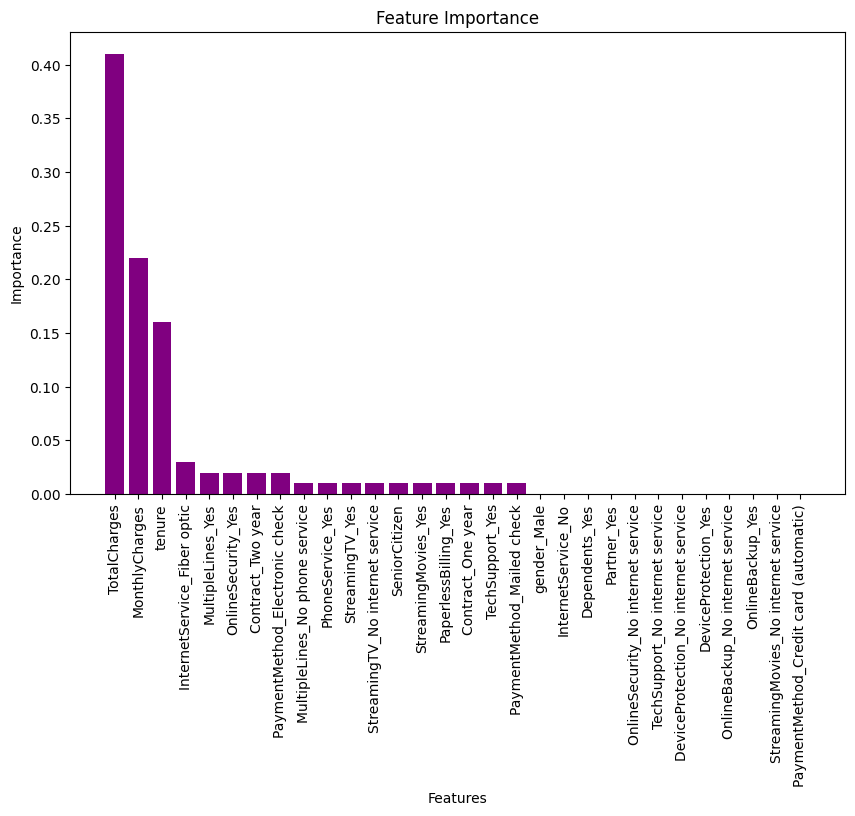

In [144]:
featur_impo_plot(adb)

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=101)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



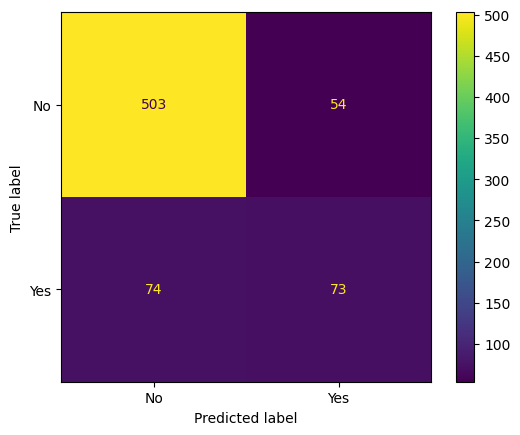

In [146]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

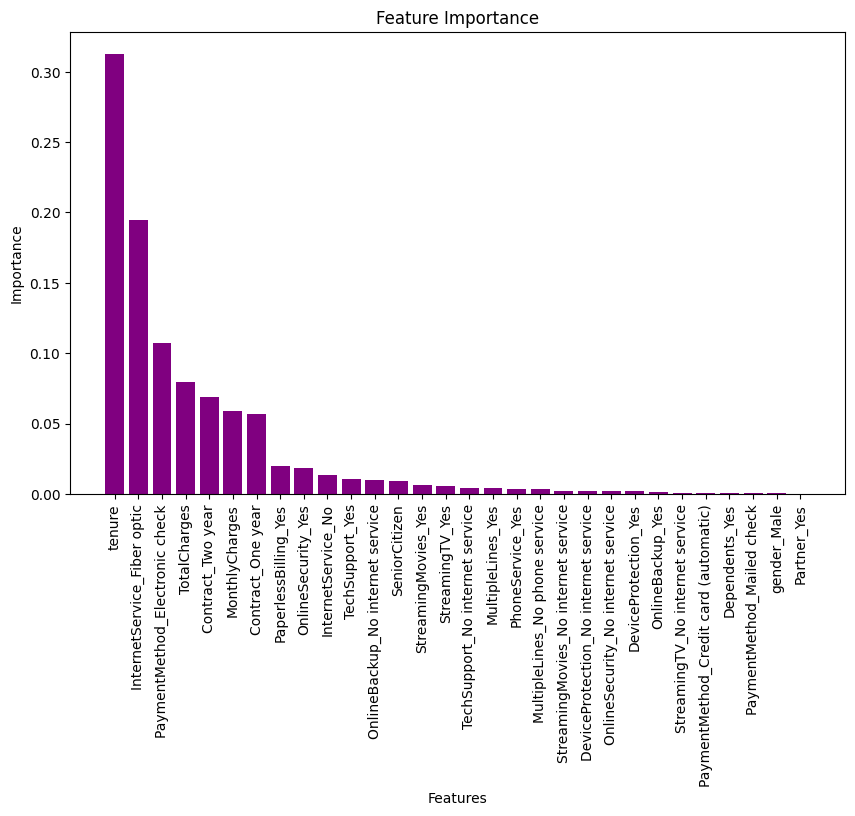

In [147]:
featur_impo_plot(gbc)

In [151]:
new_y = y.map({'Yes':1, 'No':0})
X_train, X_test, new_y_train, new_y_test = train_test_split(X, new_y, test_size=0.1, random_state=101)

In [152]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, random_state=101)
xgb.fit(X_train, new_y_train)
y_pred = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.54      0.51      0.53       147

    accuracy                           0.81       704
   macro avg       0.71      0.70      0.70       704
weighted avg       0.80      0.81      0.81       704



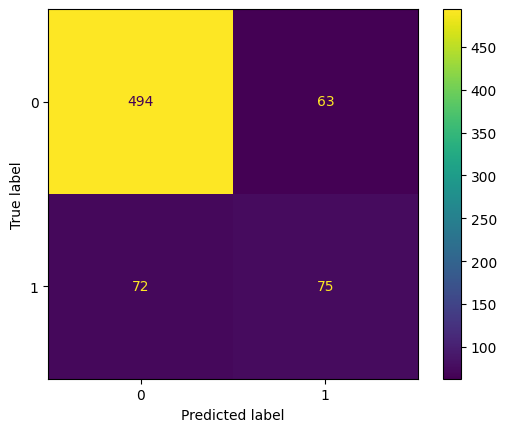

In [153]:
print(classification_report(new_y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(new_y_test, y_pred)

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [155]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.50      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



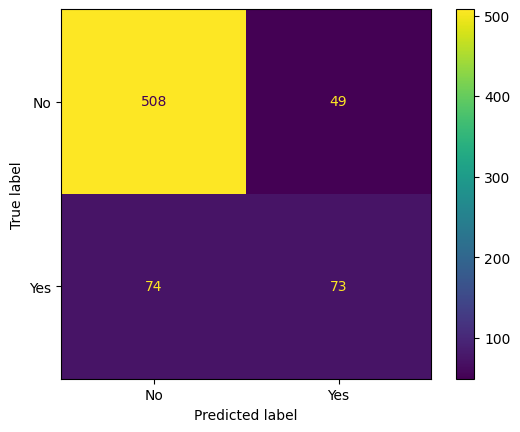

In [156]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [162]:
grid_params = {'C':[0.1,0.2,0.3,0.5,0.8,1,3,5],
               'kernel':['linear','poly','rbf','sigmoid']
               }
grid_search = GridSearchCV(estimator=svc, param_grid=grid_params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.5, 0.8, 1, 3, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [163]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 5}

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       557
         Yes       0.56      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



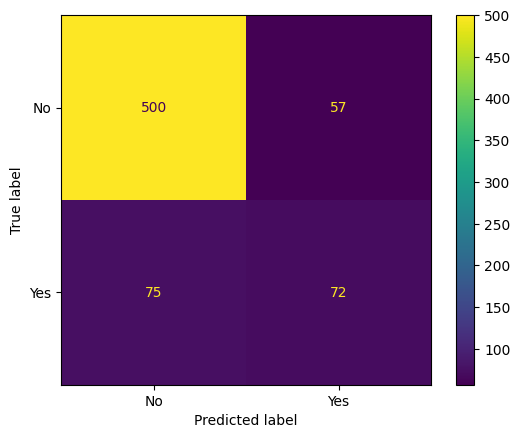

In [164]:
y_pred = grid_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [165]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.58      0.55      0.57       147

    accuracy                           0.82       704
   macro avg       0.73      0.72      0.73       704
weighted avg       0.82      0.82      0.82       704



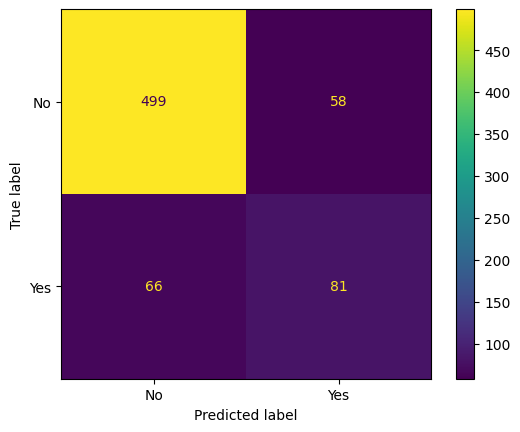

In [166]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [167]:
models_names = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'SVC', 'Logistic Regression']
accuracs =[0.81,0.80,0.84,0.82, 0.81, 0.83, 0.82]

Text(0.5, 1.0, 'Models Accuracy')

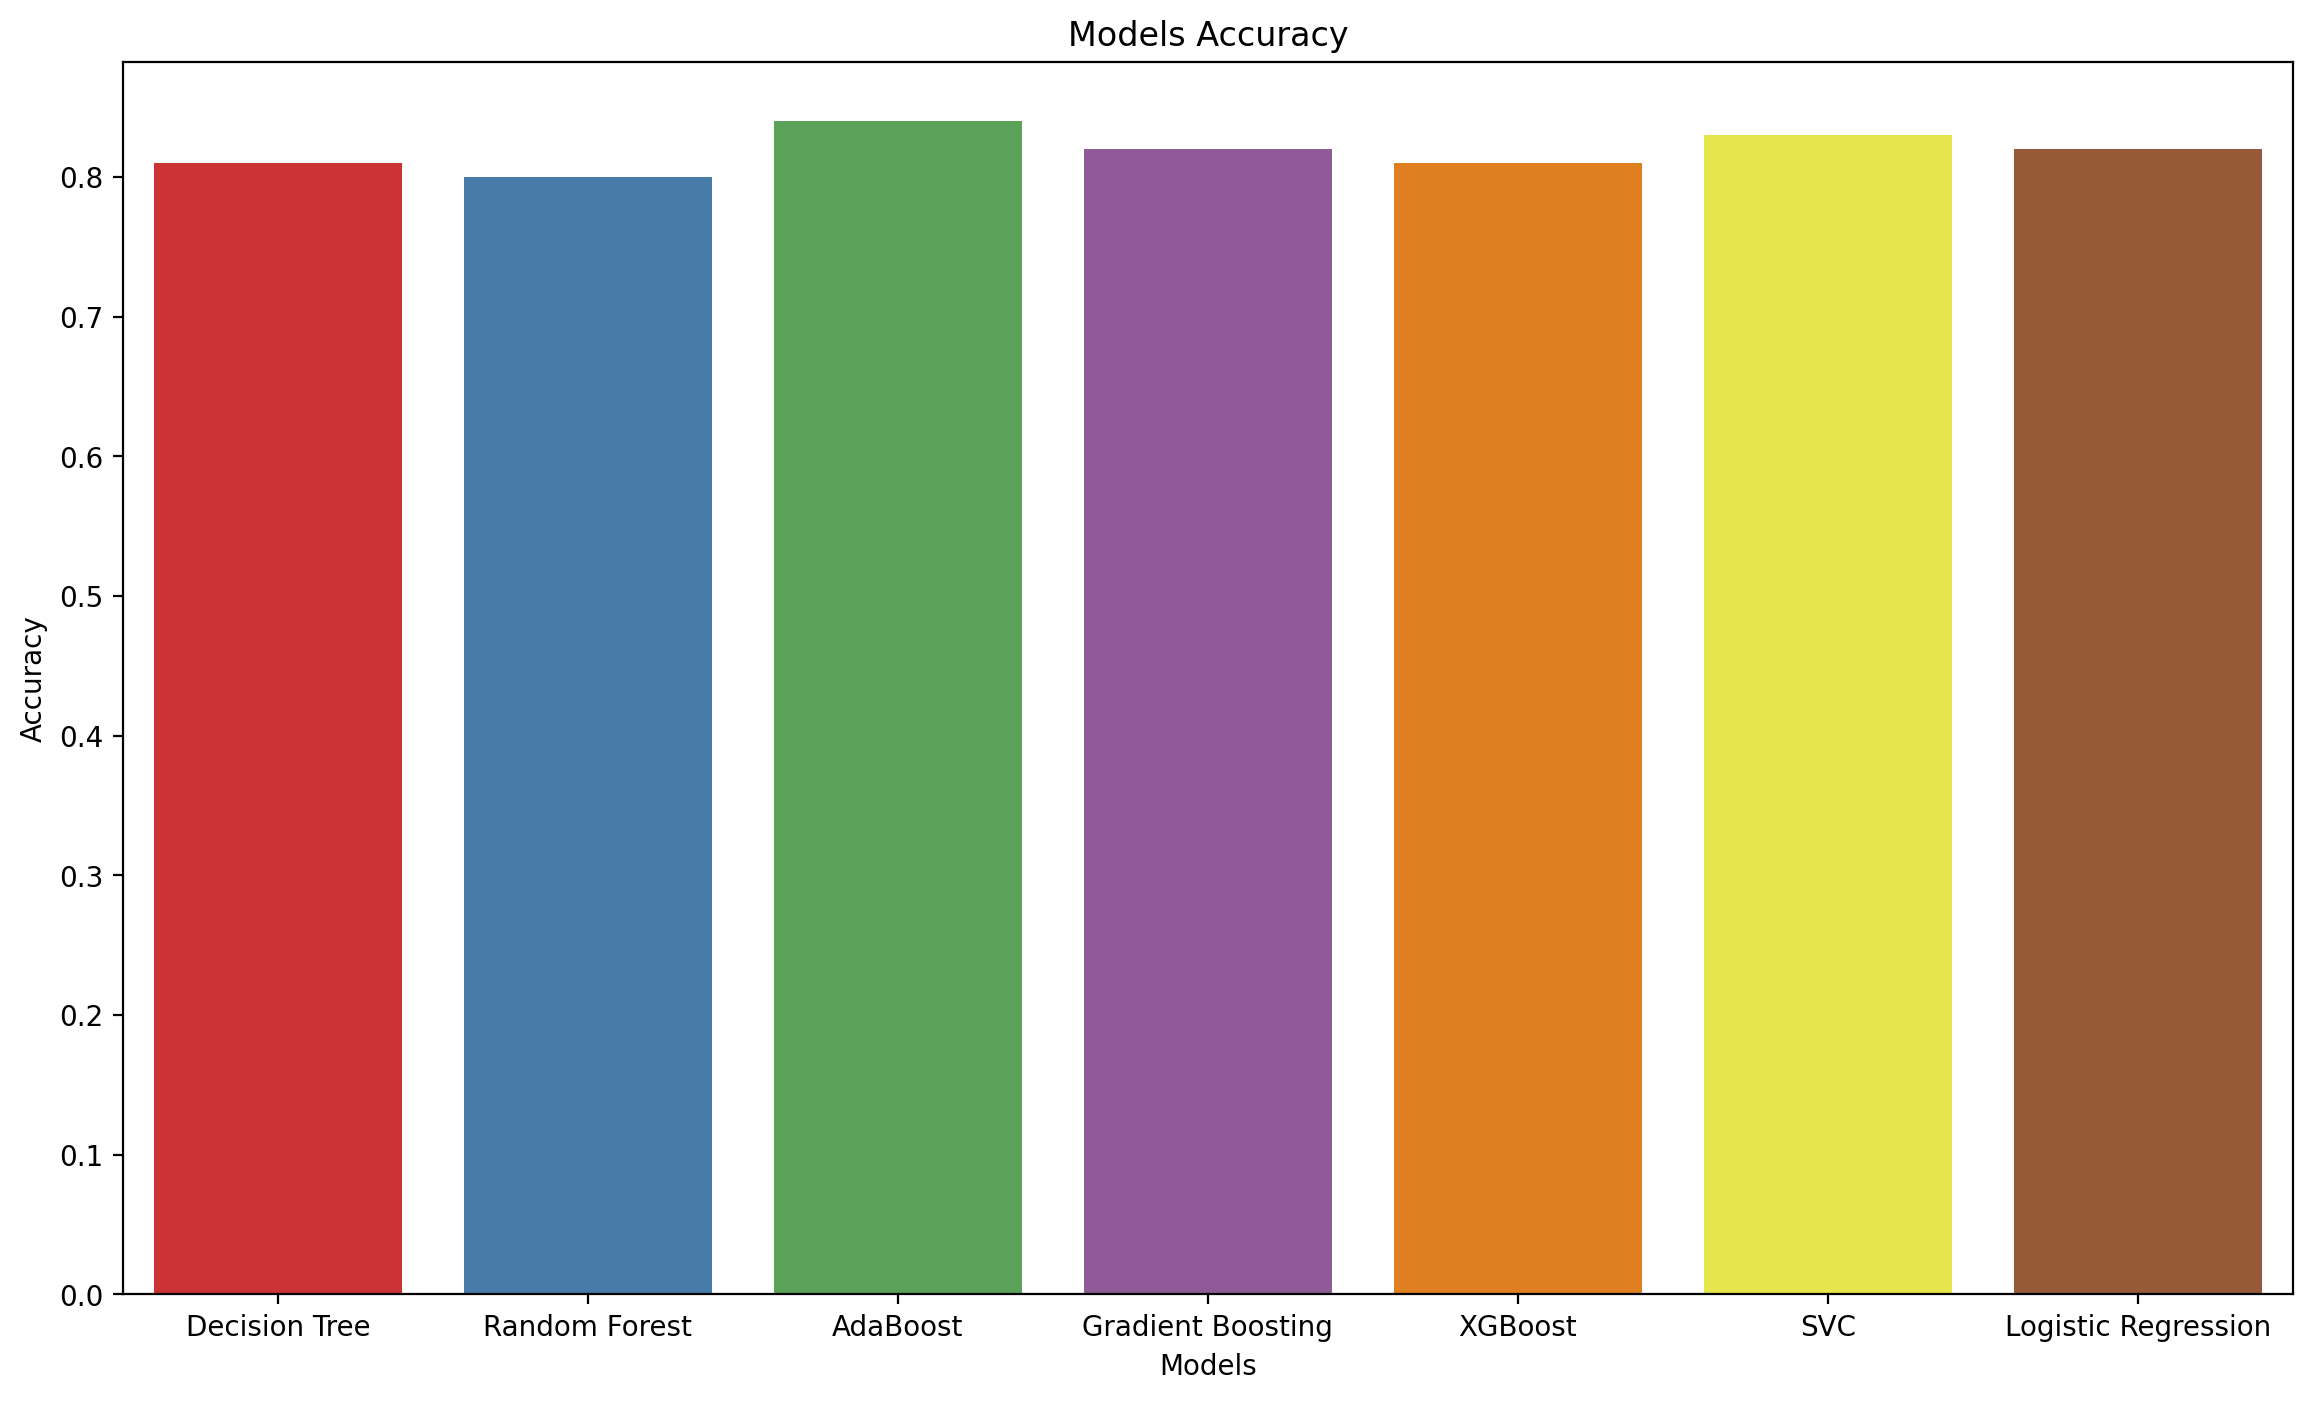

In [168]:
plt.figure(figsize=(14,8),dpi=200)
sns.barplot(x=models_names, y=accuracs, palette='Set1')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Accuracy')

# Conclusion:
# 1. AdaBoost performed the best with 84% accuracy, followed by SVC (83%) and Gradient Boosting (82%)
# 2. All models performed relatively similarly, with accuracies ranging from 80-84%
# 3. Key factors influencing customer churn:
#    - Contract type (month-to-month customers more likely to churn)
#    - Tenure (newer customers more likely to churn)
#    - Monthly charges (higher charges correlate with higher churn)
#    - Internet service type and additional services
# 4. Recommendations:
#    - Focus on customer retention in first year
#    - Encourage longer-term contracts
#    - Review pricing strategy for high-charge customers
#    - Improve technical support and service quality
#    - Consider loyalty programs and incentives for long-term customers
